# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

# Environment Setup

 Install necessary libraries & import packages

In [1]:
#!pip install folium
#!pip install scikit-learn
#!pip install  geopandas

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [3]:
import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

# Exploring initial information about the dataset

In [4]:
#Read the data and check it 
happiness = pd.read_csv('Ex2.2._Happiness-Score.csv')
happiness.head(10)

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,66,66,67,Moldova,5.640,0.657,1.301,NaN,0.232,0.171,0.000,2018
1,92,92,93,Bosnia and Herzegovina,5.129,0.915,1.078,NaN,0.280,0.216,0.000,2018
2,226,70,71,Moldova,5.529,0.685,1.328,NaN,0.245,0.181,0.000,2019
3,51,51,52,Romania,5.945,1.116,1.219,NaN,0.528,0.088,0.001,2018
4,252,96,97,Bulgaria,5.011,1.092,1.513,NaN,0.311,0.081,0.004,2019
5,203,47,48,Romania,6.070,1.162,1.232,NaN,0.462,0.083,0.005,2019
6,49,49,50,Lithuania,5.952,1.197,1.527,NaN,0.350,0.026,0.006,2018
7,201,45,46,Kosovo,6.100,0.882,1.232,NaN,0.489,0.262,0.006,2019
8,233,77,78,Bosnia and Herzegovina,5.386,0.945,1.212,NaN,0.212,0.263,0.006,2019
9,99,99,100,Bulgaria,4.933,1.054,1.515,NaN,0.359,0.064,0.009,2018


In [5]:
# Check for the size
happiness.shape

(312, 12)

In [6]:
# Check for overall info and data types
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [7]:
# Percentage of NaNs
percentage_null_values(happiness)



,Percentage_NaN
Healthy life expectancy,97.8
Perceptions of corruption,0.3
Unnamed: 0.1,0.0
Unnamed: 0,0.0
Country or region,0.0
Overall rank,0.0
GDP per capita,0.0
Score,0.0
Social support,0.0
Freedom to make life choices,0.0


In [8]:
# Check column names 
happiness.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Overall rank', 'Country or region',
       'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [9]:
# Check if there are two values for each country
happiness.sort_values(['Country or region'], ascending = True).head(10)

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
26,309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
55,144,144,145,Afghanistan,3.632,0.332,0.537,NaN,0.085,0.191,0.036,2018
29,262,106,107,Albania,4.719,0.947,0.848,NaN,0.383,0.178,0.027,2019
44,111,111,112,Albania,4.586,0.916,0.817,NaN,0.419,0.149,0.032,2018
227,83,83,84,Algeria,5.295,0.979,1.154,NaN,0.077,0.055,0.135,2018
211,243,87,88,Algeria,5.211,1.002,1.160,NaN,0.086,0.073,0.114,2019
109,141,141,142,Angola,3.795,0.730,1.125,NaN,0.000,0.079,0.061,2018
79,202,46,47,Argentina,6.086,1.092,1.432,NaN,0.471,0.066,0.050,2019
90,28,28,29,Argentina,6.388,1.073,1.468,NaN,0.570,0.062,0.054,2018
118,271,115,116,Armenia,4.559,0.850,1.055,NaN,0.283,0.095,0.064,2019


# Cleaning Data

Dropping columns that are not useful. 
- The first two are unnamed, and their values are already present in the dataframe
- The column 'Healthy life expectancy' has a higher percentage of NaNs (97.8)


In [10]:
#Drop columns that are not useful. In this case: Unnamed and Health life expectancy, since it has too many NaNS
happiness.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Healthy life expectancy'], inplace = True)

In [11]:
happiness.shape

(312, 9)

Remove countries that only appear once

In [12]:
# Remove countries that only appear once in the dataset
happiness_filtered = happiness[happiness['Country or region'].map(happiness['Country or region'].value_counts()) == 2]

In [13]:
#check the size
happiness_filtered.shape

(304, 9)

In [14]:
happiness_filtered.sort_values(['Overall rank'], ascending = True).head(30)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
303,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
304,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019
295,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
306,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019
296,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019
305,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
230,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
212,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019
298,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
288,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019


In [15]:
#get numerical and categorical columns
num_var, cat_var = get_column_names(happiness)


Numerical variables are:
 Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['Country or region'], dtype='object')
-------------------------------------------------


In [16]:
# Adjusting Country names 

happiness_filtered['Country or region'] = happiness_filtered['Country or region'].str.replace('Congo (Brazzaville)','Congo');
happiness_filtered['Country or region'] = happiness_filtered['Country or region'].str.replace('Congo (Kinshasa)','Democratic Republic of Congo');
happiness_filtered['Country or region'] = happiness_filtered['Country or region'].str.replace('Trinidad & Tobago','Trinidad and Tobago');


In [17]:
## Prepare the data

Add a continent column, to allow analysis per region

In [18]:
# Load the datasets
continents = pd.read_csv("Countries by continents.csv")  # Dataset with country-continent mapping from (Kaggle)

continents['Country'] = continents['Country'].str.replace('Burkina', 'Burkina Faso');
continents['Country'] = continents['Country'].str.replace('Burma (Myanmar)', 'Myanmar');
continents['Country'] = continents['Country'].str.replace('Czechia', 'Czech Republic');

# Merge the datasets on the 'country' column
happiness_consolidated = happiness_filtered.merge(continents, left_on="Country or region", right_on="Country", how="left")

# Drop the duplicate 'country' column from df_continents if necessary
happiness_consolidated = happiness_consolidated.drop(columns=["Country"])


happiness_consolidated.sort_values(['Overall rank'], ascending = True).head(30)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
295,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,Europe
296,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,Europe
287,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,Europe
298,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019,Europe
288,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,Europe
297,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,Europe
223,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,Europe
206,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019,Europe
290,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,Europe
280,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019,Europe


In [19]:
percentage_null_values(happiness_consolidated)

,Percentage_NaN
Continent,2.0
Perceptions of corruption,0.3
Country or region,0.0
Overall rank,0.0
Score,0.0
GDP per capita,0.0
Freedom to make life choices,0.0
Social support,0.0
Generosity,0.0
year,0.0


In [20]:
# Check for missing continents
happiness_consolidated[happiness_consolidated['Continent'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
7,46,Kosovo,6.100,0.882,1.232,0.489,0.262,0.006,2019,NaN
21,66,Kosovo,5.662,0.855,1.230,0.448,0.274,0.023,2018,NaN
118,110,Palestinian Territories,4.696,0.657,1.247,0.225,0.103,0.066,2019,NaN
130,104,Palestinian Territories,4.743,0.642,1.217,0.266,0.086,0.076,2018,NaN
240,58,Northern Cyprus,5.835,1.229,1.211,0.495,0.179,0.154,2018,NaN
245,64,Northern Cyprus,5.718,1.263,1.252,0.417,0.191,0.162,2019,NaN


In [21]:
## Add missing values
happiness_consolidated ['Continent'][happiness_consolidated ['Country or region'] == 'Kosovo'] = 'Europe'
happiness_consolidated ['Continent'][happiness_consolidated ['Country or region'] == 'Palestinian Territories'] = 'Asia'
happiness_consolidated ['Continent'][happiness_consolidated ['Country or region'] == 'Northern Cyprus'] = 'Asia'

In [22]:
# Check for missing values in 'Perceptions of corruption' (0.3% of NaN)
happiness_consolidated [happiness_consolidated['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
303,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018,Asia


In [23]:
#create dataframes for each year
happiness_2018 = happiness_consolidated[happiness_consolidated['year']==2018].reset_index()
happiness_2019 = happiness_consolidated[happiness_consolidated['year']==2019].reset_index()
happiness_2019.sort_values(['Overall rank'], ascending = True).head(20)

,index,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent
148,296,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,Europe
149,298,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019,Europe
144,288,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,Europe
105,206,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019,Europe
140,280,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019,Europe
145,289,6,Switzerland,7.480,1.452,1.526,0.572,0.263,0.343,2019,Europe
146,291,7,Sweden,7.343,1.387,1.487,0.574,0.267,0.373,2019,Europe
147,292,8,New Zealand,7.307,1.303,1.557,0.585,0.330,0.380,2019,Oceania
141,283,9,Canada,7.278,1.365,1.505,0.584,0.285,0.308,2019,North America
133,265,10,Austria,7.246,1.376,1.475,0.532,0.244,0.226,2019,Europe


In [24]:
# Find the countries with the highest values for each factor
top_gdp_country = happiness_2019.loc[happiness_2019['GDP per capita'].idxmax(), ['Country or region', 'Overall rank']]
top_social_country = happiness_2019.loc[happiness_2019['Social support'].idxmax(), ['Country or region', 'Overall rank']]
top_freedom_country = happiness_2019.loc[happiness_2019['Freedom to make life choices'].idxmax(), ['Country or region', 'Overall rank']]

# Display the results
print("Country with highest GDP per capita:", top_gdp_country)
print("Country with highest Social support:", top_social_country)
print("Country with highest Freedom to make life choices:", top_freedom_country)

gdp= happiness_2019.loc[happiness_2019['GDP per capita'].idxmax()]
gdp

Country with highest GDP per capita: Country or region    Qatar
Overall rank            29
Name: 125, dtype: object
Country with highest Social support: Country or region    Iceland
Overall rank               4
Name: 105, dtype: object
Country with highest Freedom to make life choices: Country or region    Uzbekistan
Overall rank                 41
Name: 134, dtype: object


index                             248
Overall rank                       29
Country or region               Qatar
Score                           6.374
GDP per capita                  1.684
Social support                  1.313
Freedom to make life choices    0.555
Generosity                       0.22
Perceptions of corruption       0.167
year                             2019
Continent                        Asia
Name: 125, dtype: object

In [25]:
# Find the corresponding value from 2019
corruption_UAE_value_2019 = happiness_2019.loc[happiness_2019["Country or region"] == 'United Arab Emirates', "Perceptions of corruption"].values[0]

# Fill the missing value in 2018 dataset
happiness_consolidated.loc[happiness_consolidated["Country or region"] == 'United Arab Emirates', "Perceptions of corruption"] = corruption_UAE_value_2019
happiness_2018.loc[happiness_2018["Country or region"] == 'United Arab Emirates', "Perceptions of corruption"] = corruption_UAE_value_2019

happiness_2018 [happiness_2018['Perceptions of corruption'].isnull()]

,index,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Continent


# Analyzing the Data

Define colors for the continents

In [26]:
# Define colorpalette for the continents
continent_colors = {
    'Europe': '#1f77b4',  # blue
    'North America': '#ff7f0e',  # orange
    'Asia': '#2ca02c',  # green
    'South America': '#d62728',  # red
    'Africa': '#9467bd',  # purple
    'Oceania': '#8c564b'  # brown
}

## Checking for outliers

### Compare the scores per Continent

In [27]:
import numpy as np
def comparison_per_continent(dataframe, factor):
    plt.figure(figsize=(12, 8))  # Increase figure size
    
    # Create the main boxplot
    sns.boxplot(data=dataframe, x="Continent", y=factor, hue="Continent", palette=continent_colors, width=0.6)
    
    # Identify and label outliers
    for continent in dataframe["Continent"].unique():
        subset = dataframe[dataframe["Continent"] == continent]
        
        # Calculate quartiles and IQR
        Q1 = subset["Score"].quantile(0.25)
        Q3 = subset["Score"].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
    plt.xlabel("Continent")
    plt.ylabel(factor)
       
    plt.show()



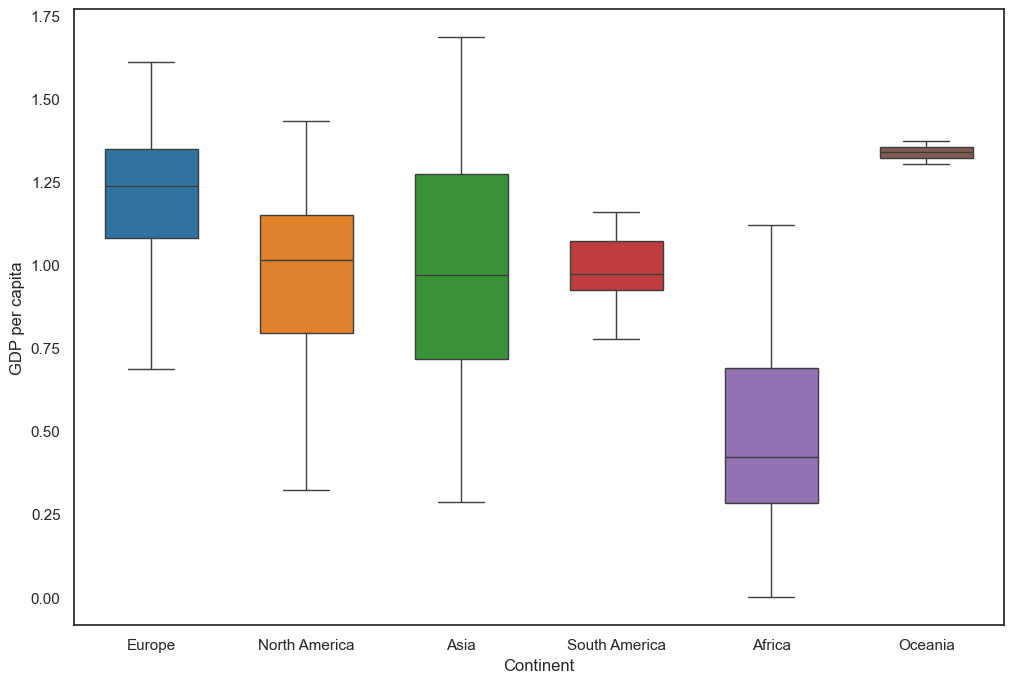

In [28]:
comparison_per_continent(happiness_2019, "GDP per capita")

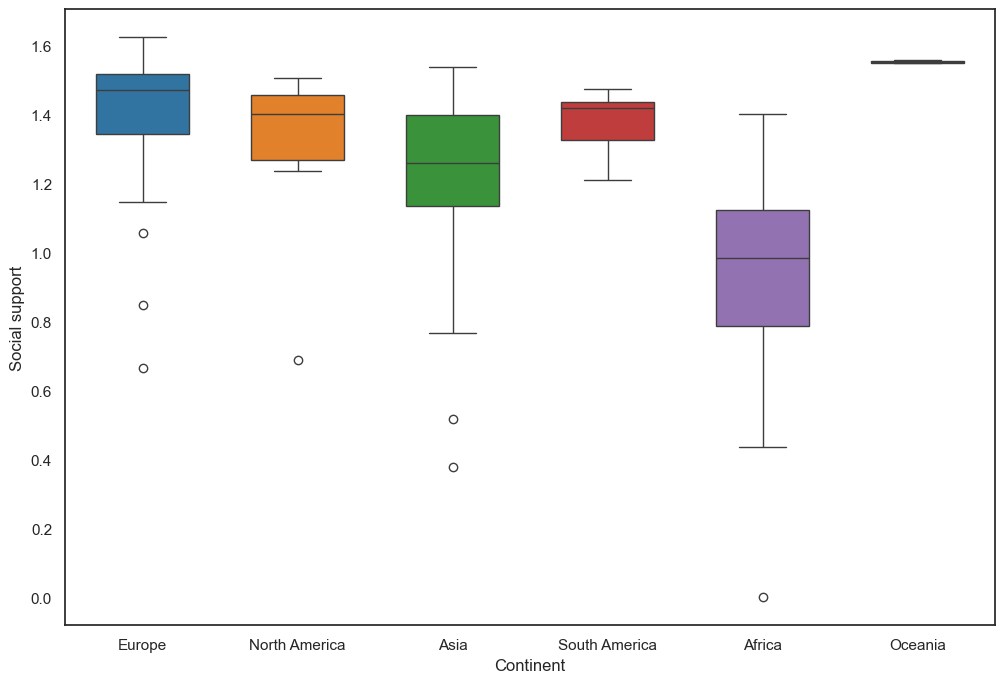

In [29]:
comparison_per_continent(happiness_2019, "Social support")

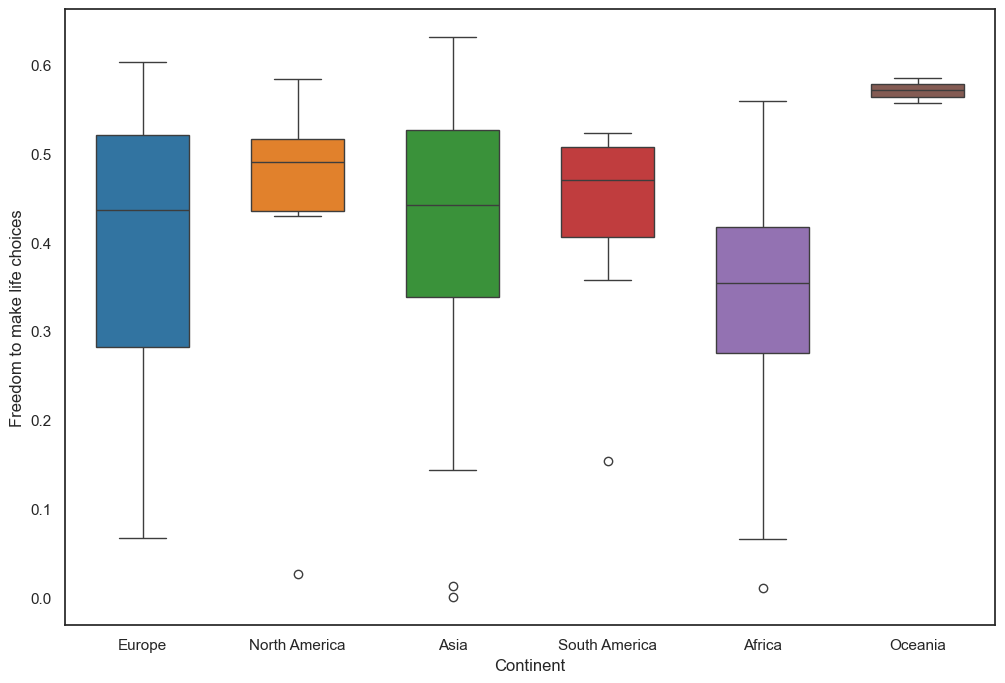

In [30]:
comparison_per_continent(happiness_2019, "Freedom to make life choices")

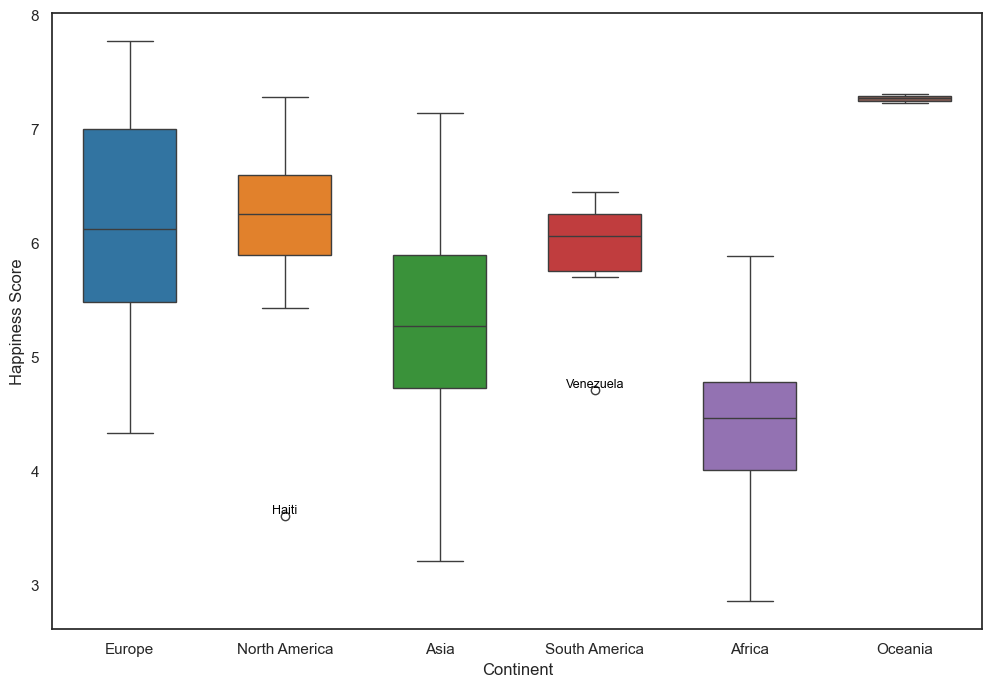

In [31]:
import numpy as np

plt.figure(figsize=(12, 8))  # Increase figure size

# Create the main boxplot
sns.boxplot(data=happiness_2019, x="Continent", y="Score", hue="Continent", palette=continent_colors, width=0.6)

# Identify and label outliers
for continent in happiness_2019["Continent"].unique():
    subset = happiness_2019[happiness_2019["Continent"] == continent]
    
    # Calculate quartiles and IQR
    Q1 = subset["Score"].quantile(0.25)
    Q3 = subset["Score"].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get outlier points
    outliers = subset[(subset["Score"] < lower_bound) | (subset["Score"] > upper_bound)]
    
    # Label each outlier with its country name
    for _, row in outliers.iterrows():
        plt.text(
            x=row["Continent"], 
            y=row["Score"], 
            s=row["Country or region"],  # Country name as label
            fontsize=9, 
            color="black", 
            ha='center', 
            va='bottom'            
        )

plt.xlabel("Continent")
plt.ylabel("Happiness Score")
#plt.title("Happiness Score Distribution by Continent")

plt.show()



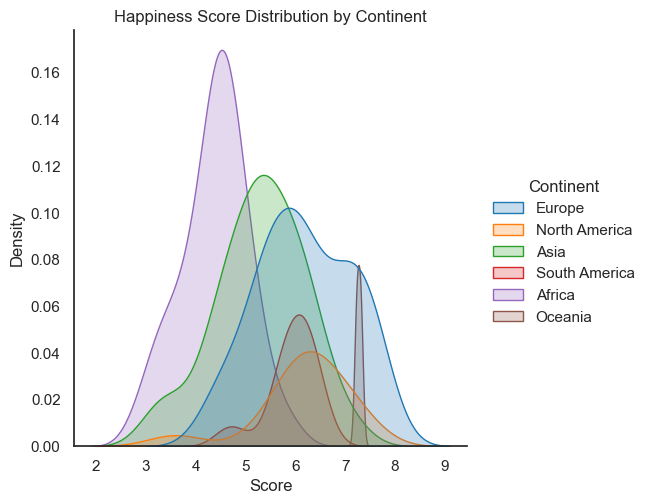

In [32]:
sns.displot(happiness_2019, x="Score", hue="Continent", palette=continent_colors, kind="kde", fill=True)
plt.title("Happiness Score Distribution by Continent")
plt.show()

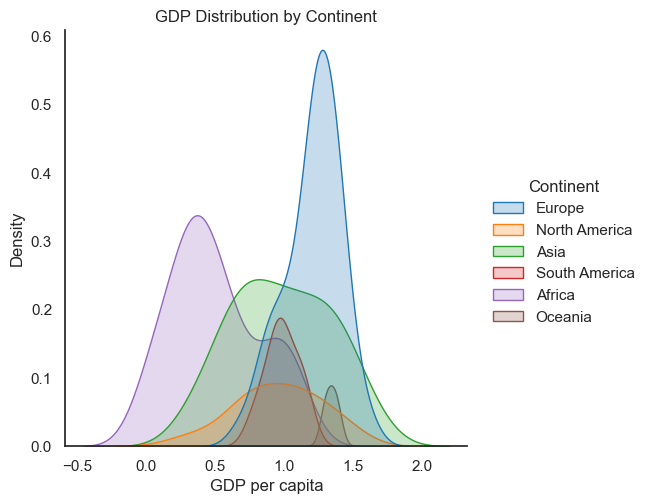

In [33]:
sns.displot(happiness_2019, x="GDP per capita", hue="Continent", palette=continent_colors, kind="kde", fill=True)
plt.title("GDP Distribution by Continent")
plt.show()

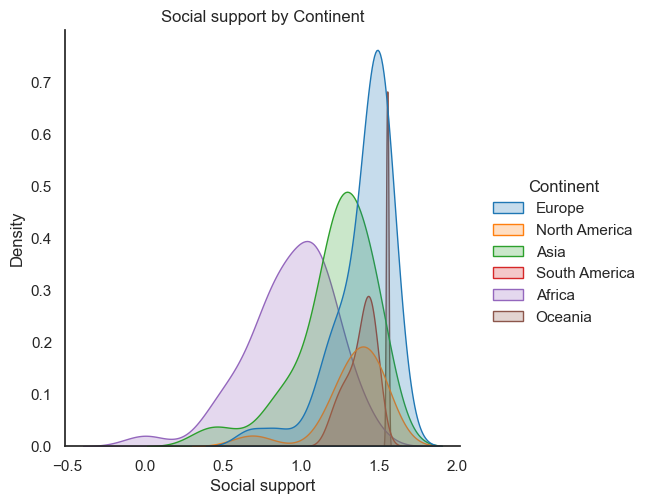

In [34]:
sns.displot(happiness_2019, x="Social support", hue="Continent", palette=continent_colors, kind="kde", fill=True)
plt.title("Social support by Continent")
plt.show()

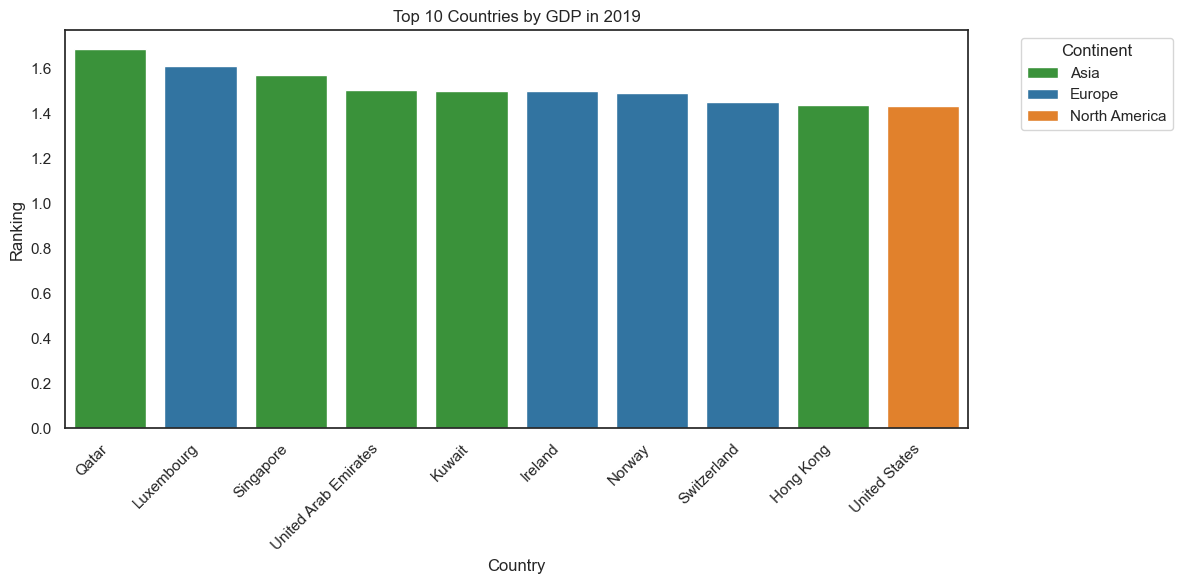

In [65]:
top_10_gdp = happiness_2019.sort_values(by='GDP per capita', ascending = False).head(10)
top_10_gdp

 # Plot Top 10 Countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10['Country or region'], y=top_10_gdp['GDP per capita'], 
            hue=top_10['Continent'], palette=continent_colors)
plt.title(f'Top 10 Countries by GDP in 2019')
plt.xlabel('Country')
plt.ylabel('Ranking')
plt.xticks(rotation=45, ha='right')


# Move the legend outside the plot
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [69]:

def plot_top_bottom_countries(df, year):
    """
    Plots the top 10 and bottom 10 countries based on ranking for a given year.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'Country or region', 'Overall rank', and 'Continent'.
        year (int or str): Year to be used for annotation in the plot titles and labels.
    """
    # Get the top 10 and bottom 10 countries based on rank (lower rank means better position)
    top_10 = df.sort_values(by='Overall rank').head(20)
    bottom_10 = df.sort_values(by='Overall rank').tail(10)
    
    # Plot Top 10 Countries
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10['Country or region'], y=top_10['Overall rank'], 
                hue=top_10['Continent'], palette=continent_colors)
    plt.title(f'Top 10 Countries by Ranking in {year}')
    plt.xlabel('Country')
    plt.ylabel(f'Ranking ({year})')
    plt.xticks(rotation=45, ha='right')
    
    
    # Move the legend outside the plot
    plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Plot Bottom 10 Countries
    plt.figure(figsize=(12, 6))
    sns.barplot(x=bottom_10['Country or region'], y=bottom_10['Overall rank'], 
                hue=bottom_10['Continent'], palette=continent_colors)
    plt.title(f'Bottom 10 Countries by Ranking in {year}')
    plt.xlabel('Country')
    plt.ylabel(f'Ranking ({year})')
    plt.xticks(rotation=45, ha='right')
    
    
    # Move the legend outside the plot
    plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


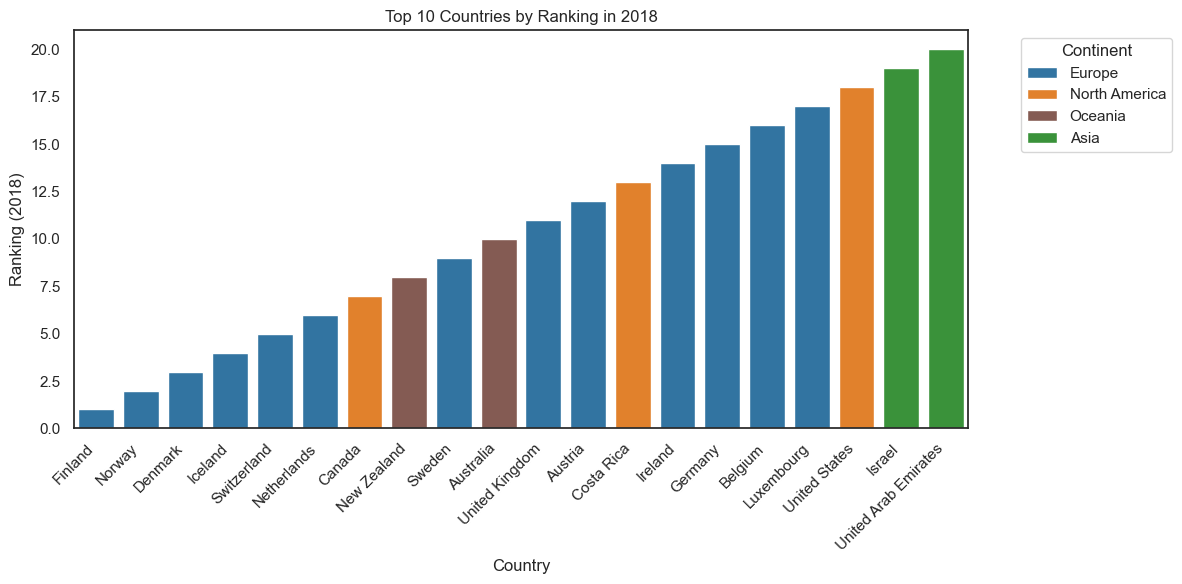

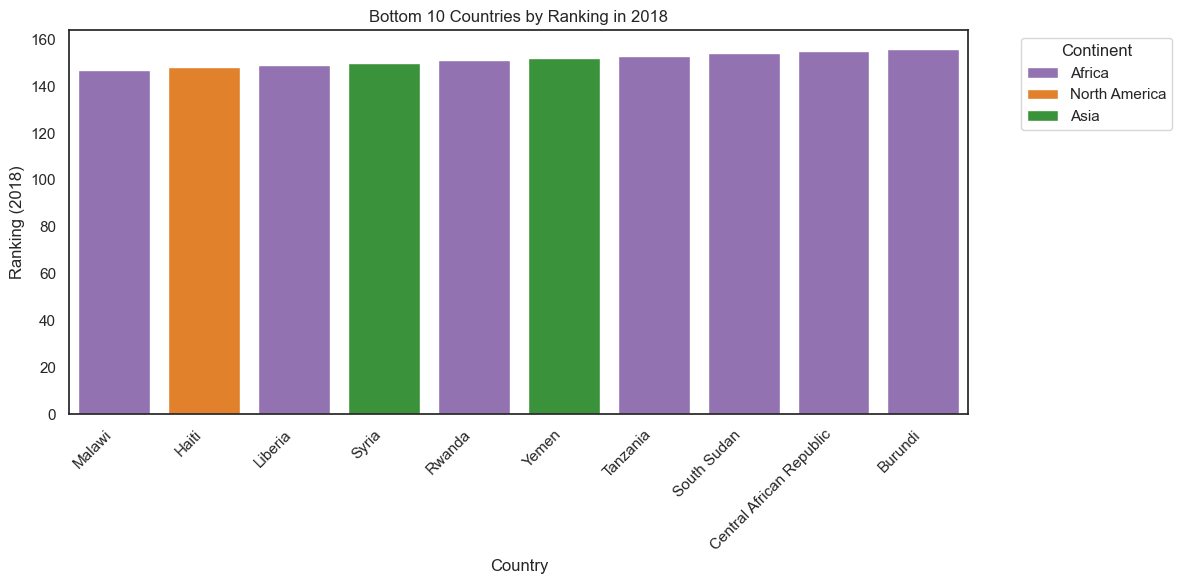

In [70]:
plot_top_bottom_countries(happiness_2018, '2018')

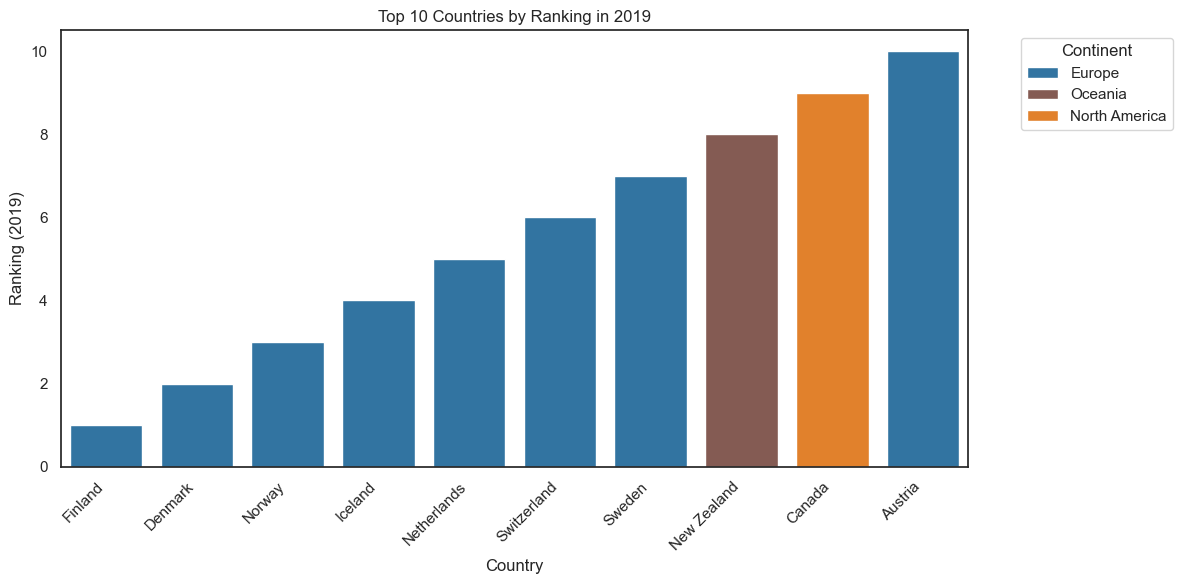

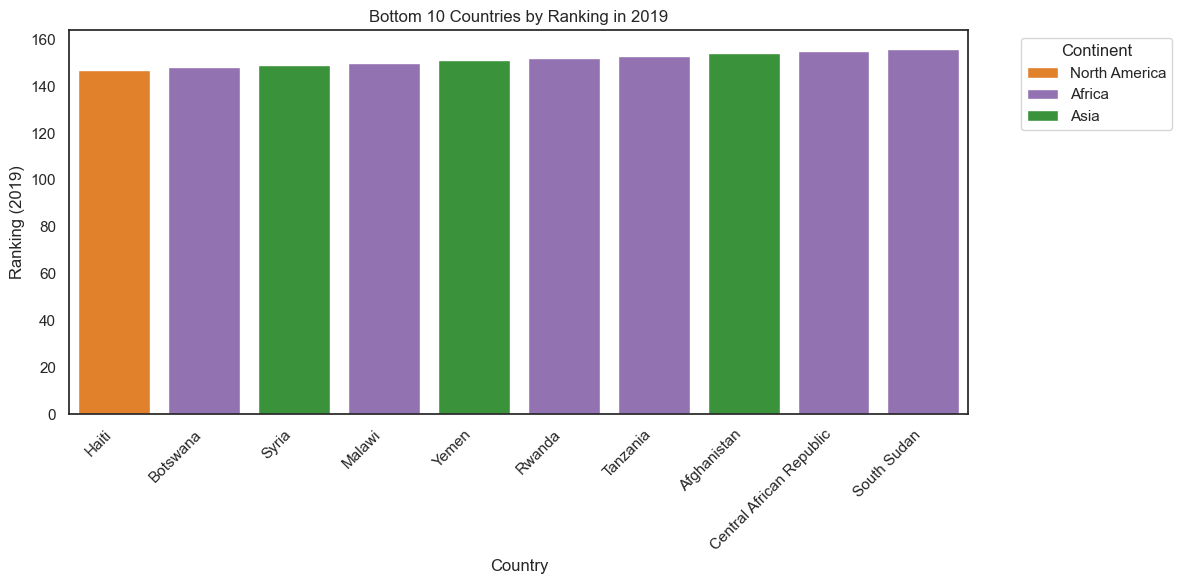

In [68]:
plot_top_bottom_countries(happiness_2019, '2019')

## Changes in the top 20 countries 

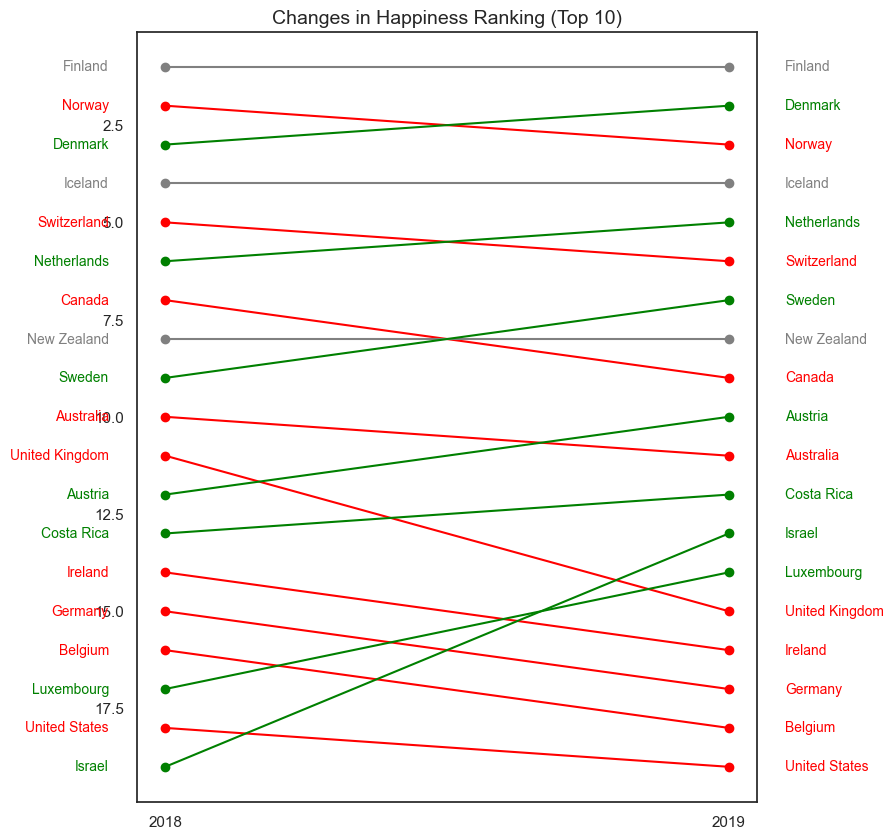

In [71]:
# Top 20 countries of each year
top_happiness_2018 = happiness_2018.sort_values(['Overall rank'], ascending = True).head(20)

top_happiness_2019 = happiness_2019.sort_values(['Overall rank'], ascending = True).head(20)

# Merge data on Country
top_happiness = top_happiness_2018.merge(top_happiness_2019, on="Country or region", suffixes=("_2018", "_2019"))

# Plot the rank change as a slope chart
plt.figure(figsize=(8, 10))

for _, row in top_happiness.iterrows():
    top_happiness_2018, top_happiness_2019 = row["Overall rank_2018"], row["Overall rank_2019"]
    color = "gray"  # Default color for no change
    if top_happiness_2018 > top_happiness_2019:
        color = "green"  # Improved ranking (the lower the number, the best the ranking)
    elif top_happiness_2018 < top_happiness_2019:
        color = "red"  # Declined ranking
    
    plt.plot([0, 1], [top_happiness_2018, top_happiness_2019], marker="o", color=color, linestyle="-")
    plt.text(-0.1, top_happiness_2018, row["Country or region"], ha="right", va="center", fontsize=10, color=color)
    plt.text(1.1, top_happiness_2019, row["Country or region"], ha="left", va="center", fontsize=10, color=color)

plt.xticks([0, 1], ["2018", "2019"])
plt.gca().invert_yaxis()  # Rank 1 should be at the top
plt.title("Changes in Happiness Ranking (Top 10)", fontsize=14)
plt.show()

# Check for movements in the ranking

category
No Change         15
<5 Positions      38
5-10 Positions    16
>10 Positions     83
Name: count, dtype: int64


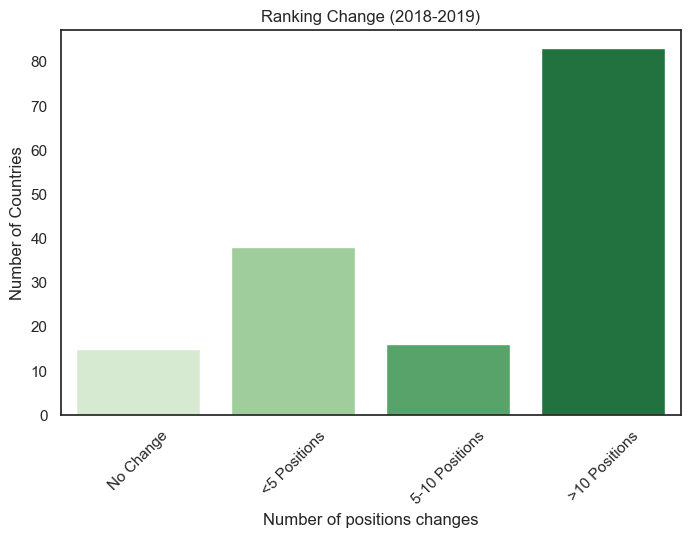

In [40]:
# Ensure the year column is treated as a numeric type
happiness_consolidated['year'] = pd.to_numeric(happiness_consolidated['year'], errors='coerce')

# Pivot the dataframe to have countries as rows and years as columns
df_pivot = happiness_consolidated.pivot_table(index='Country or region', columns='year', values='Overall rank')

# Calculate the rank difference between 2019 and 2018
df_pivot['rank_diff'] = df_pivot[2019] - df_pivot[2018]

# Define a function to categorize the rank differences
def categorize_difference(diff):
    if diff == 0:
        return 'No Change'
    elif 0 < diff < 5:
        return '<5 Positions'
    elif 5 <= diff <= 10:
        return '5-10 Positions'
    else:
        return '>10 Positions'

# Apply the categorization function
df_pivot['category'] = df_pivot['rank_diff'].apply(categorize_difference)

# Define the correct category order
category_order = ['No Change', '<5 Positions', '5-10 Positions', '>10 Positions']

# Convert the 'category' column to a categorical type with the defined order
df_pivot['category'] = pd.Categorical(df_pivot['category'], categories=category_order, ordered=True)

# Count the number of countries in each category, ensuring the correct order
category_counts = df_pivot['category'].value_counts().reindex(category_order)
print(category_counts)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Greens')

# Labels and title
plt.xlabel('Number of positions changes')
plt.ylabel('Number of Countries')
plt.title('Ranking Change (2018-2019)')
plt.xticks(rotation=45)

# Show the plot
plt.show()



## Get major movements. Top 10 improvements, top 10 deterioration

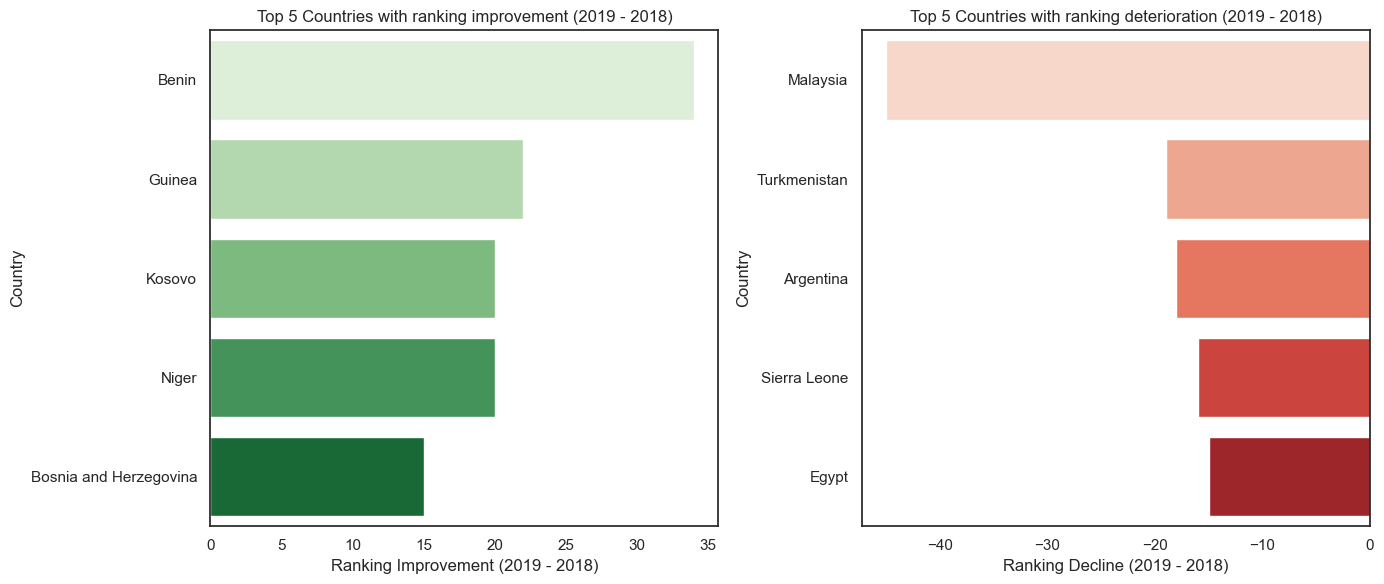

In [41]:
# Ensure the year column is treated as a numeric type
happiness_consolidated['year'] = pd.to_numeric(happiness_consolidated['year'], errors='coerce')

# Pivot the dataframe to have countries as rows and years as columns
df_pivot = happiness_consolidated.pivot_table(index='Country or region', columns='year', values='Overall rank')

# Calculate the ranking difference (positive means improvement)
df_pivot['rank_diff'] = df_pivot[2018] - df_pivot[2019]

# Sort by rank_diff to find top 10 with highest improvement and top 10 with largest decrease
top_10_improvement = df_pivot.sort_values(by='rank_diff', ascending=False).head(5)
top_10_decrease = df_pivot.sort_values(by='rank_diff', ascending=True).head(5)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 improvements plot
sns.barplot(x=top_10_improvement['rank_diff'], y=top_10_improvement.index, ax=axes[0], palette='Greens')
axes[0].set_title('Top 5 Countries with ranking improvement (2019 - 2018)')
axes[0].set_xlabel('Ranking Improvement (2019 - 2018)')
axes[0].set_ylabel('Country')

# Top 10 decreases plot
sns.barplot(x=top_10_decrease['rank_diff'], y=top_10_decrease.index, ax=axes[1], palette='Reds')
axes[1].set_title('Top 5 Countries with ranking deterioration (2019 - 2018)')
axes[1].set_xlabel('Ranking Decline (2019 - 2018)')
axes[1].set_ylabel('Country')

# Show the plot
plt.tight_layout()
plt.show()


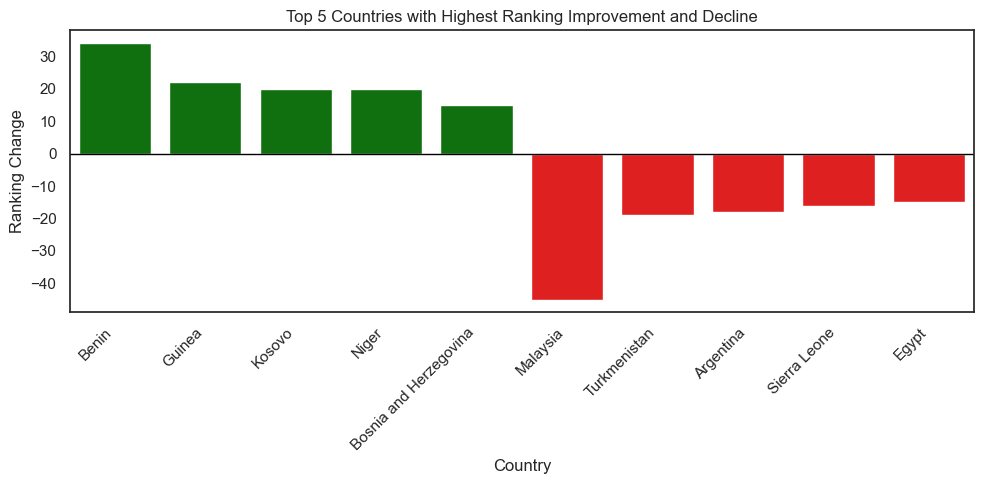

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the year column is treated as a numeric type
happiness_consolidated['year'] = pd.to_numeric(happiness_consolidated['year'], errors='coerce')

# Pivot the dataframe to have countries as rows and years as columns
df_pivot = happiness_consolidated.pivot_table(index='Country or region', columns='year', values='Overall rank')

# Calculate the ranking difference (positive means improvement)
df_pivot['rank_diff'] = df_pivot[2018] - df_pivot[2019]

# Select the top 5 improvements and top 5 deteriorations
top_5_improvement = df_pivot.sort_values(by='rank_diff', ascending=False).head(5)
top_5_decrease = df_pivot.sort_values(by='rank_diff', ascending=True).head(5)

# Combine both into a single DataFrame for plotting
top_5_combined = pd.concat([top_5_improvement, top_5_decrease])

# Define colors: green for improvement, red for decrease
colors = ['green' if x > 0 else 'red' for x in top_5_combined['rank_diff']]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_combined.index, y=top_5_combined['rank_diff'], palette=colors)

# Titles and labels
plt.axhline(0, color='black', linewidth=1)  # Add a baseline at y=0
plt.title('Top 5 Countries with Highest Ranking Improvement and Decline')
plt.xlabel('Country')
plt.ylabel('Ranking Change')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


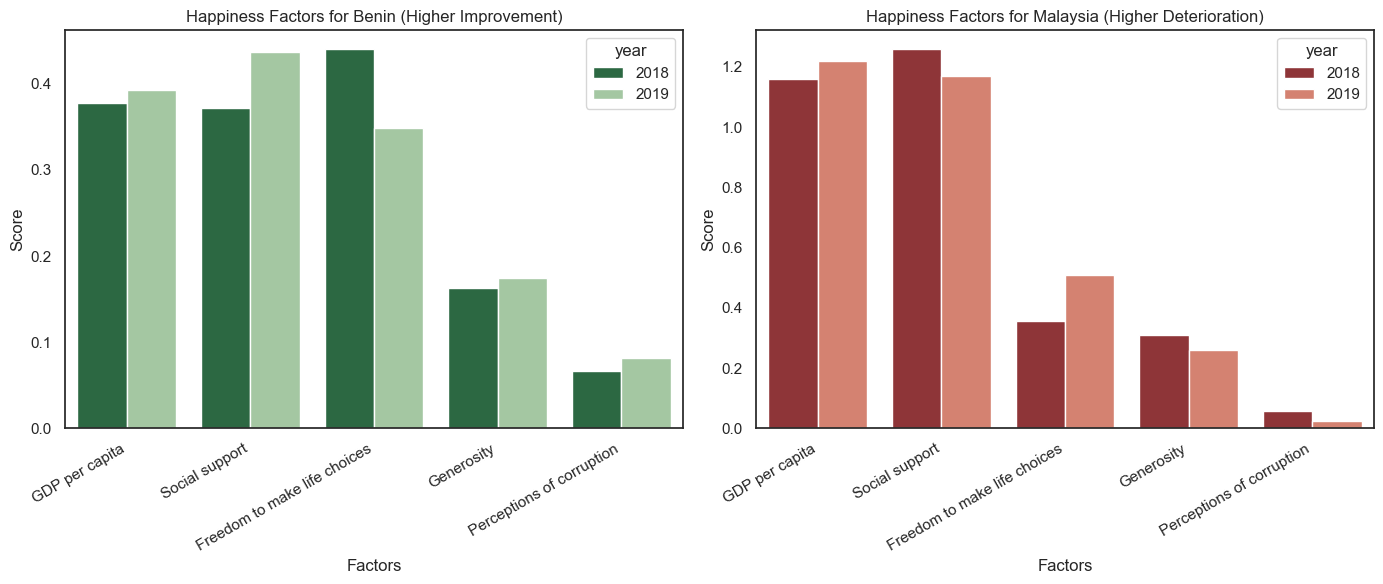

In [43]:
# Get the top (1) best and worst country in rank change
best_improvement_country = top_10_improvement.head(1).index[0]
worst_deterioration_country = top_10_decrease.head(1).index[0]

# Extract data for these countries for 2018 and 2019
factors = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

best_country_data = happiness_consolidated[happiness_consolidated['Country or region'] == best_improvement_country]
worst_country_data = happiness_consolidated[happiness_consolidated['Country or region'] == worst_deterioration_country]

# Prepare data for plotting
def prepare_plot_data(country_data, country_name):
    df = country_data[country_data['year'].isin([2018, 2019])][['year'] + factors]
    df = df.melt(id_vars=['year'], var_name='Factor', value_name='Score')
    df['Country'] = country_name
    return df

best_plot_data = prepare_plot_data(best_country_data, best_improvement_country)
worst_plot_data = prepare_plot_data(worst_country_data, worst_deterioration_country)

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


best_fixed_colors = {2018: "#22723F", 2019: "#9FCD9C"}
worst_fixed_colors= {2018: "#9D262A", 2019: "#E57760"}

# Plot Best Improvement
sns.barplot(data=best_plot_data, x='Factor', y='Score', hue='year', ax=axes[0], palette=best_fixed_colors)
axes[0].set_title(f'Happiness Factors for {best_improvement_country} (Higher Improvement)')
axes[0].set_xlabel('Factors')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')

# Plot Worst Deterioration
sns.barplot(data=worst_plot_data, x='Factor', y='Score', hue='year', ax=axes[1], palette=worst_fixed_colors)
axes[1].set_title(f'Happiness Factors for {worst_deterioration_country} (Higher Deterioration)')
axes[1].set_xlabel('Factors')
axes[1].set_ylabel('Score')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()



## List of factors influencing happiness

In [44]:
# List of factors influencing contributing to happiness
factors = num_var.drop(labels=['Overall rank','year'])
factors

Index(['Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Correlation Matrix

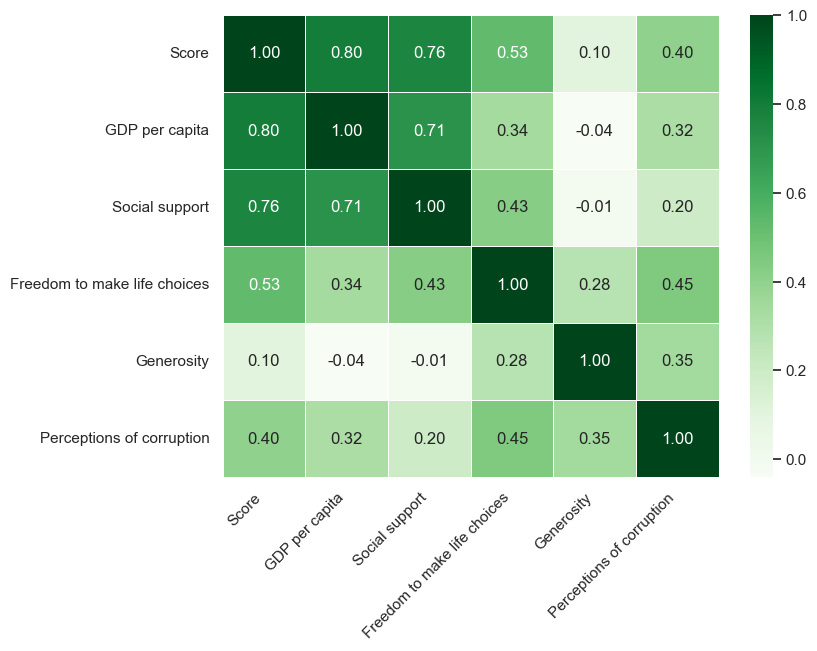

In [45]:
# Calculate the correlation matrix of the numerical variables
correlation_matrix = happiness_consolidated[factors].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

# Add a title
#plt.title("Correlation Matrix of Happiness variables")
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

## Happiness Score distribution in 2018 and in 2019

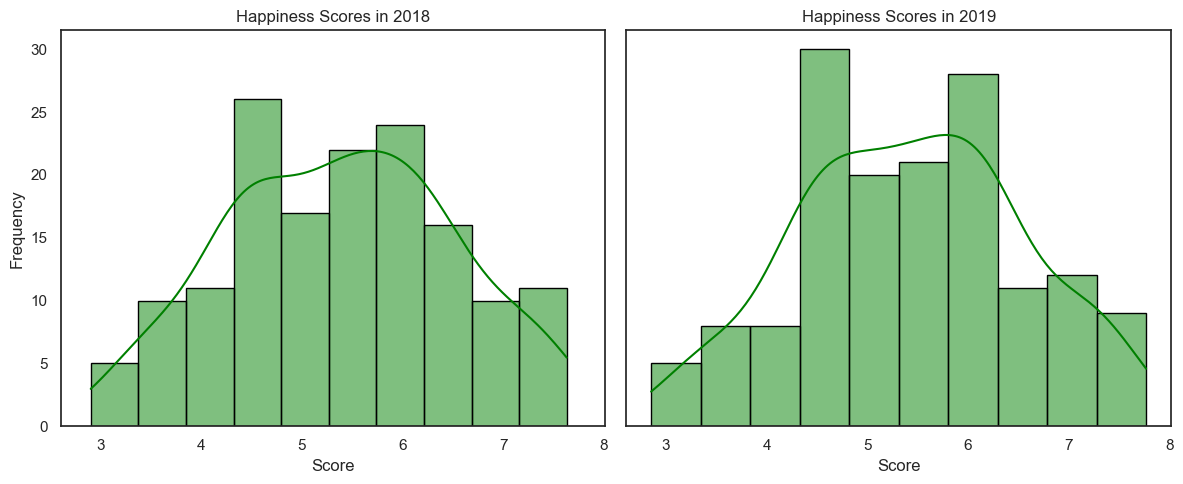

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

sns.histplot(happiness_2018["Score"], bins=10, kde=True, color="green", edgecolor="black", ax=axes[0])
axes[0].set_title("Happiness Scores in 2018")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")

sns.histplot(happiness_2019["Score"], bins=10, kde=True, color="green", edgecolor="black", ax=axes[1])
axes[1].set_title("Happiness Scores in 2019")
axes[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


## How the Factors contribute to Happiness

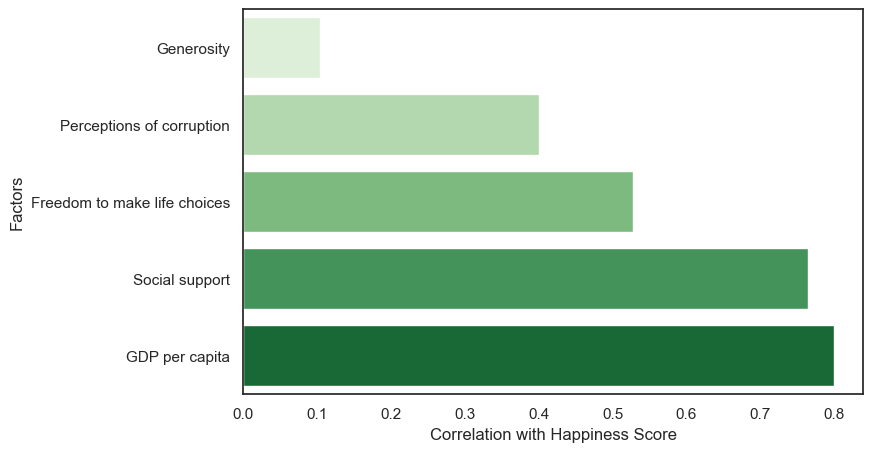

In [47]:
# Compute correlations with Happiness Score, we drop Score, since it is correlation to itself is 1.0 
correlations = happiness_consolidated[factors].corr()["Score"].drop("Score")

# Sort by absolute correlation value (strongest first)
correlations_sorted = correlations.abs().sort_values(ascending=True)

# Plot sorted correlations
plt.figure(figsize=(8,5))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="Greens")

plt.xlabel("Correlation with Happiness Score")
plt.ylabel("Factors")
#plt.title("Ranking of Factors Contributing to Happiness")
plt.show()

## How the factors correlate to Score

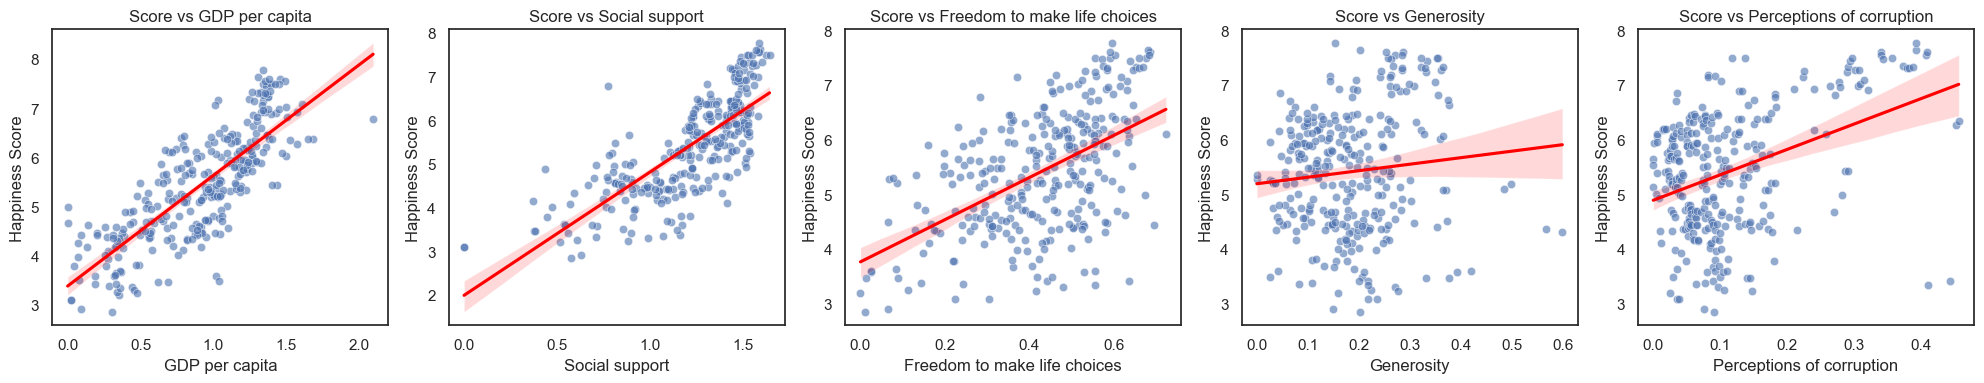

In [48]:
# Set up the figure with multiple subplots
factors_without_score = factors.drop(labels = 'Score')
fig, axes = plt.subplots(1, len(factors_without_score), figsize=(20, 4))

# Loop through factors and plot scatter plots
for i, factor in enumerate(factors_without_score):
    sns.scatterplot(data=happiness_consolidated, x=factor, y="Score", alpha=0.6, ax=axes[i])
    sns.regplot(data=happiness_consolidated, x=factor, y="Score", scatter=False, color="red", ax=axes[i])  # Add trend line
    axes[i].set_title(f"Score vs {factor}")
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()

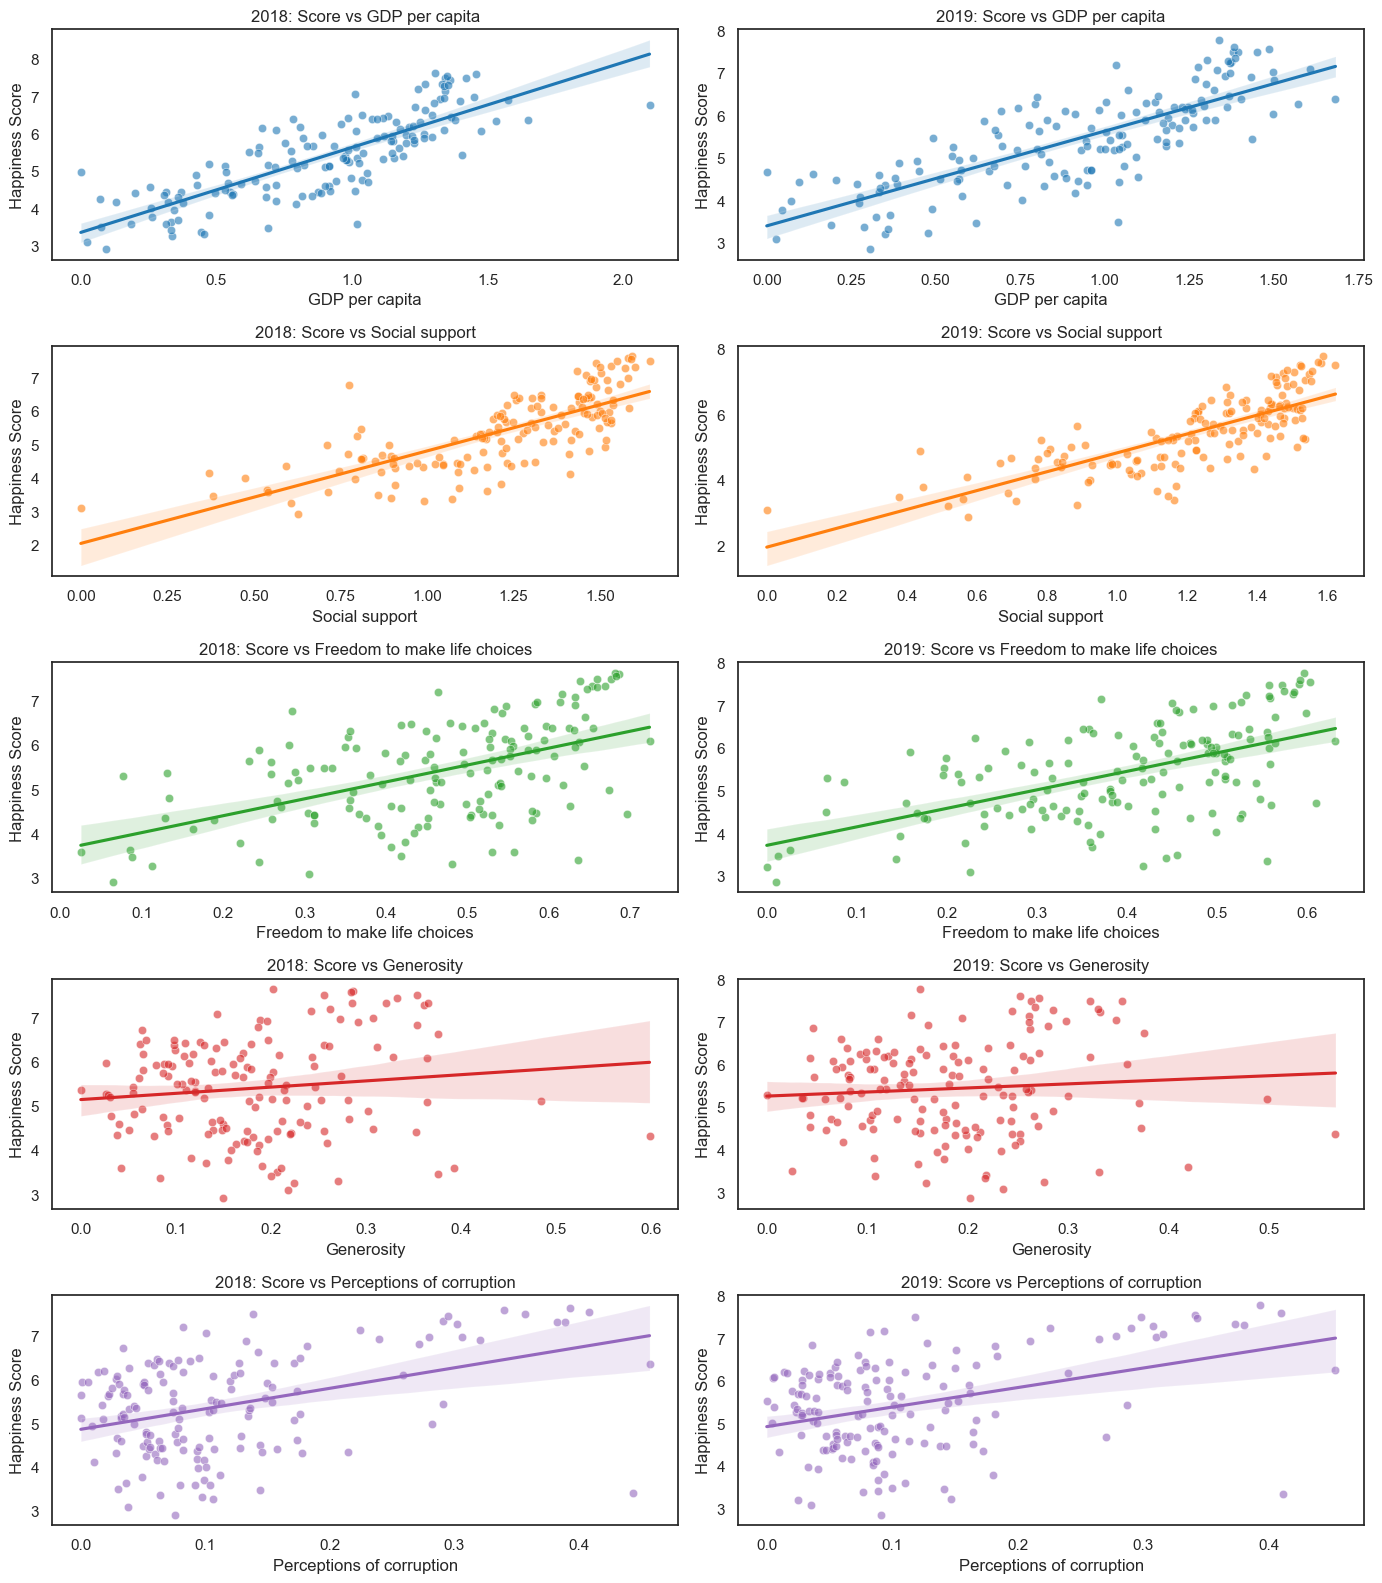

In [49]:
from scipy.stats import zscore

# Define a color palette (you can customize this)
color_palette = sns.color_palette("tab10", n_colors=len(factors_without_score))

# Set up the figure with 5 rows and 2 columns for the subplots
fig, axes = plt.subplots(5, 2, figsize=(14, 16))

# Loop through factors and plot scatter plots for both years
for i, factor in enumerate(factors_without_score):
    # Assign a color for each factor from the color_palette
    factor_color = color_palette[i]
    
    # 2018 Data Plot
    sns.scatterplot(data=happiness_2018, x=factor, y="Score", alpha=0.6, ax=axes[i, 0], color=factor_color)
    sns.regplot(data=happiness_2018, x=factor, y="Score", scatter=False, color=factor_color, ax=axes[i, 0])  # Add trend line
    axes[i, 0].set_title(f"2018: Score vs {factor}")
    axes[i, 0].set_xlabel(factor)
    axes[i, 0].set_ylabel("Happiness Score")

    # 2019 Data Plot
    sns.scatterplot(data=happiness_2019, x=factor, y="Score", alpha=0.6, ax=axes[i, 1], color=factor_color)
    sns.regplot(data=happiness_2019, x=factor, y="Score", scatter=False, color=factor_color, ax=axes[i, 1])  # Add trend line
    axes[i, 1].set_title(f"2019: Score vs {factor}")
    axes[i, 1].set_xlabel(factor)
    axes[i, 1].set_ylabel("Happiness Score")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()




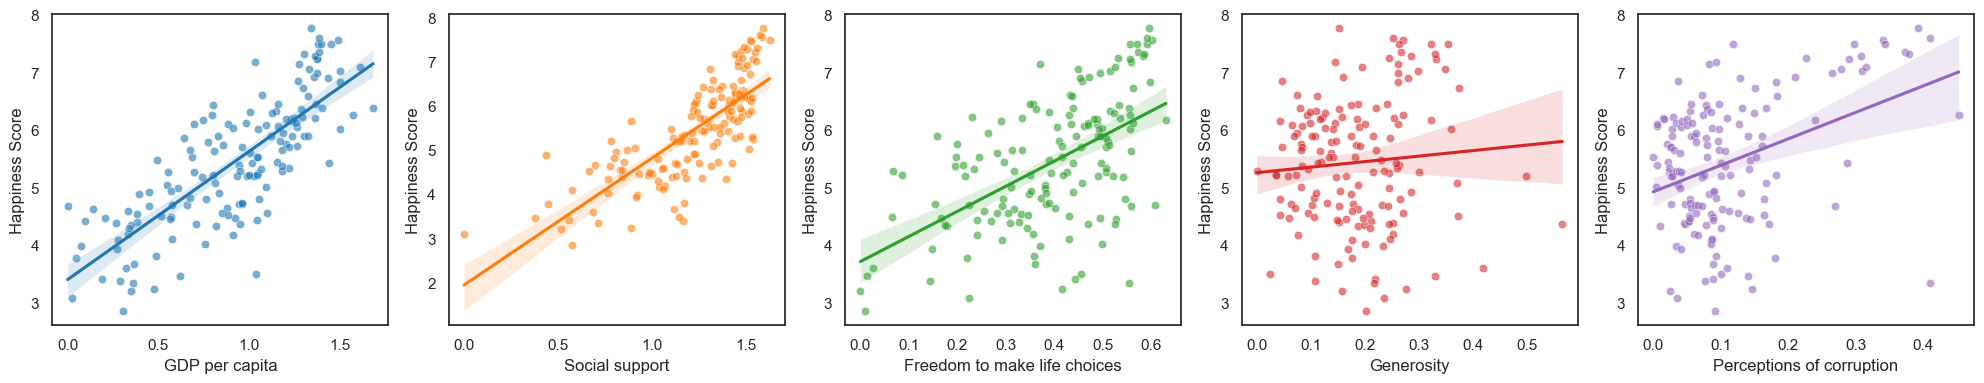

In [50]:
from scipy.stats import zscore

# Define a color palette (you can customize this)
color_palette = sns.color_palette("tab10", n_colors=len(factors_without_score))

# Set up the figure with 5 rows and 2 columns for the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop through factors and plot scatter plots for both years
for i, factor in enumerate(factors_without_score):
    # Assign a color for each factor from the color_palette
    factor_color = color_palette[i]

    # 2019 Data Plot
    sns.scatterplot(data=happiness_2019, x=factor, y="Score", alpha=0.6, ax=axes[i], color=factor_color)
    sns.regplot(data=happiness_2019, x=factor, y="Score", scatter=False, color=factor_color, ax=axes[i])  # Add trend line
    #axes[i].set_title(f"Score vs {factor}")
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("Happiness Score")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()




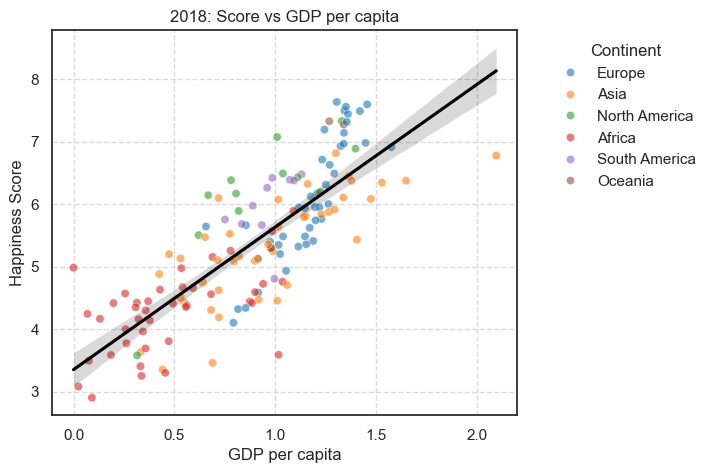

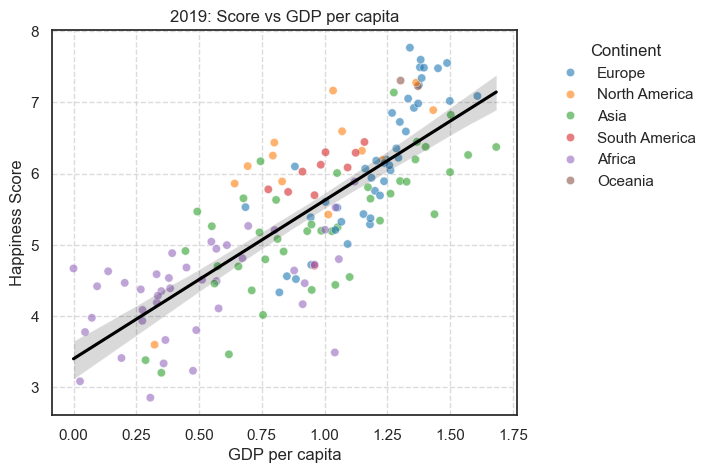

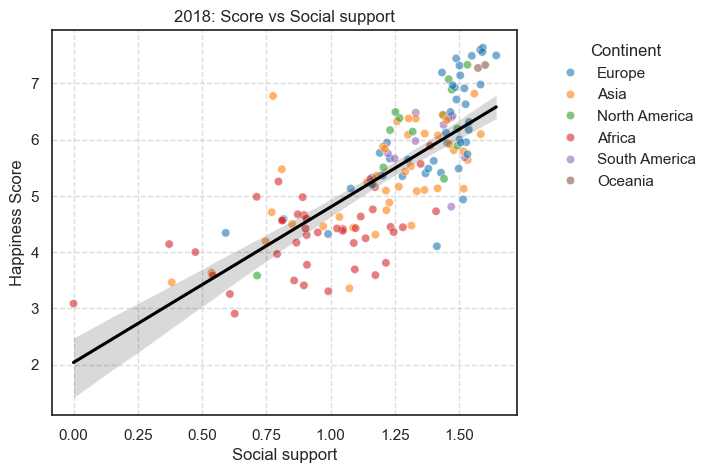

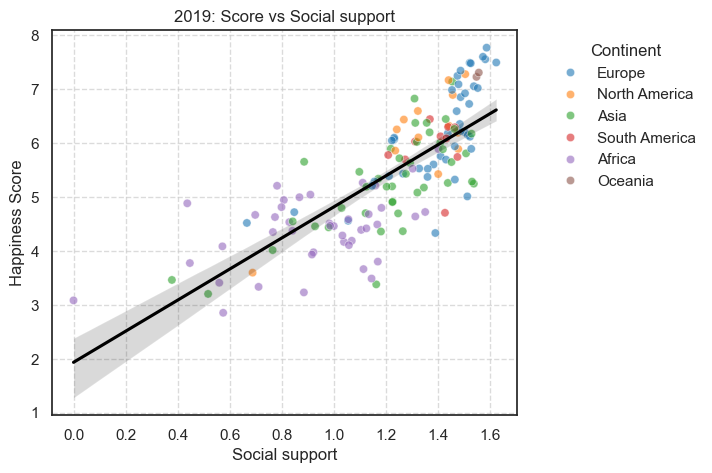

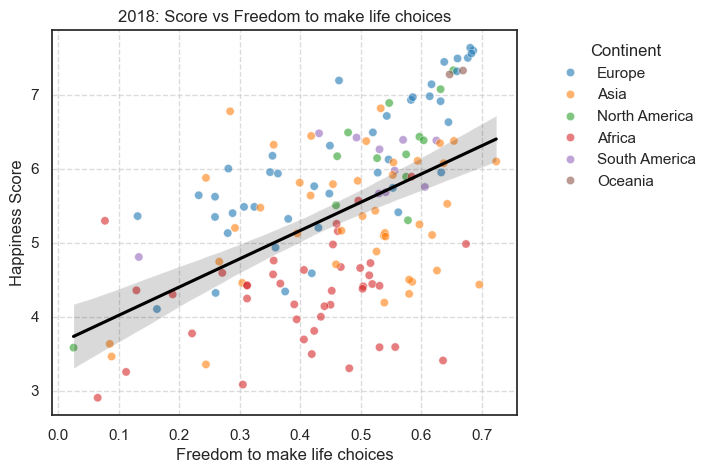

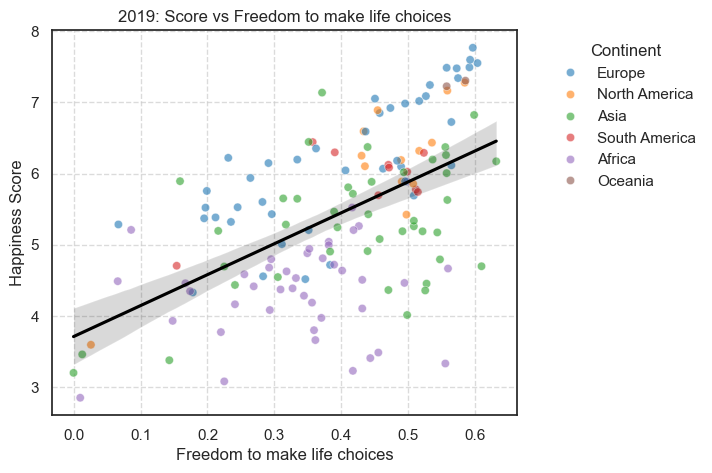

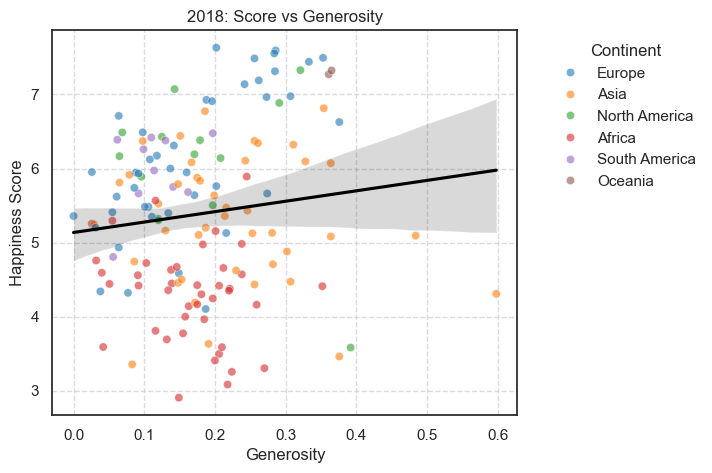

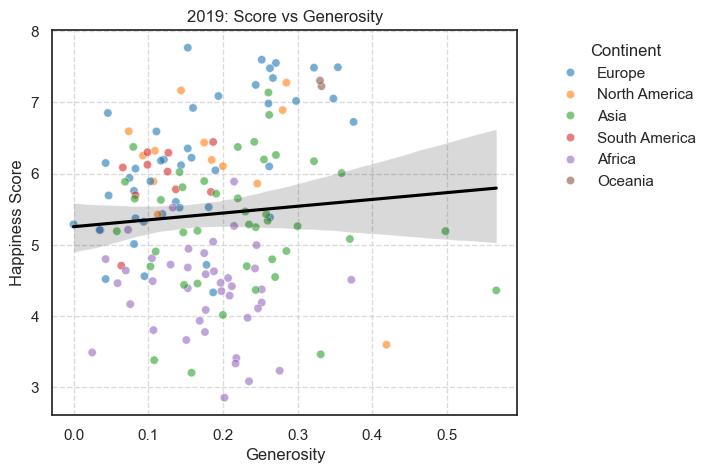

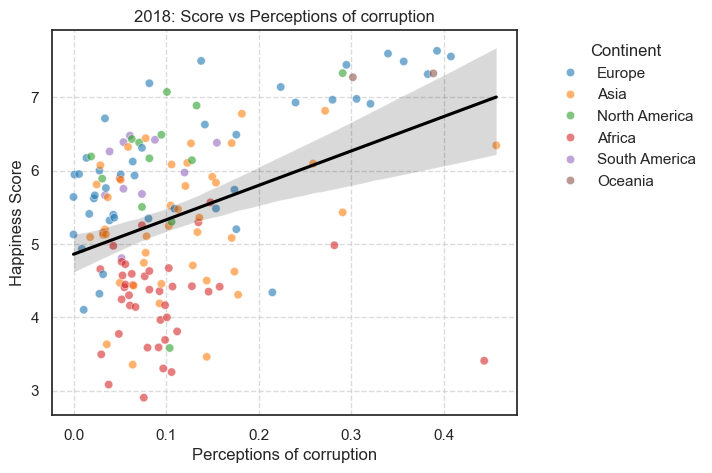

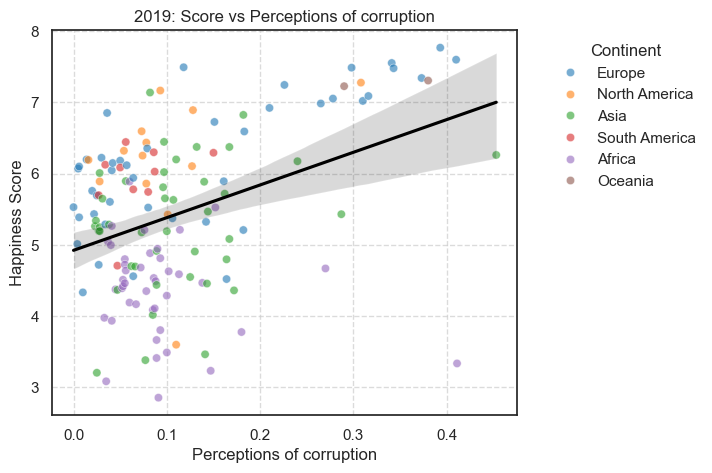

In [51]:
from scipy.stats import zscore

# Define a color palette for continents
palette = sns.color_palette("tab10", n_colors=happiness_2018["Continent"].nunique())

# Loop through each factor and create separate scatter plots
for factor in factors_without_score:
    # 2018 Data Plot
    plt.figure(figsize=(6, 5))
   
    sns.scatterplot(data=happiness_2018, x=factor, y="Score", hue="Continent", palette=palette, alpha=0.6)
   
    sns.regplot(data=happiness_2018, x=factor, y="Score", scatter=False, color="black")  # Trend line
    
    plt.title(f"2018: Score vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
     # Add grid
    plt.grid(True, linestyle="--", alpha=0.7)  

    # Modify legend (remove border)
    legend = plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

    plt.show()

    # 2019 Data Plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=happiness_2019, x=factor, y="Score", hue="Continent", palette=palette, alpha=0.6)
    sns.regplot(data=happiness_2019, x=factor, y="Score", scatter=False, color="black")  # Trend line
    plt.title(f"2019: Score vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
     # Add grid
    plt.grid(True, linestyle="--", alpha=0.7)  

    # Modify legend (remove border)
    legend = plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

    plt.show()



In [52]:
happiness_consolidated[factors].skew(numeric_only=True)

Score                          -0.014479
GDP per capita                 -0.320672
Social support                 -1.120557
Freedom to make life choices   -0.614619
Generosity                      0.805146
Perceptions of corruption       1.627786
dtype: float64

### Influence of GDP per Capita on the Score

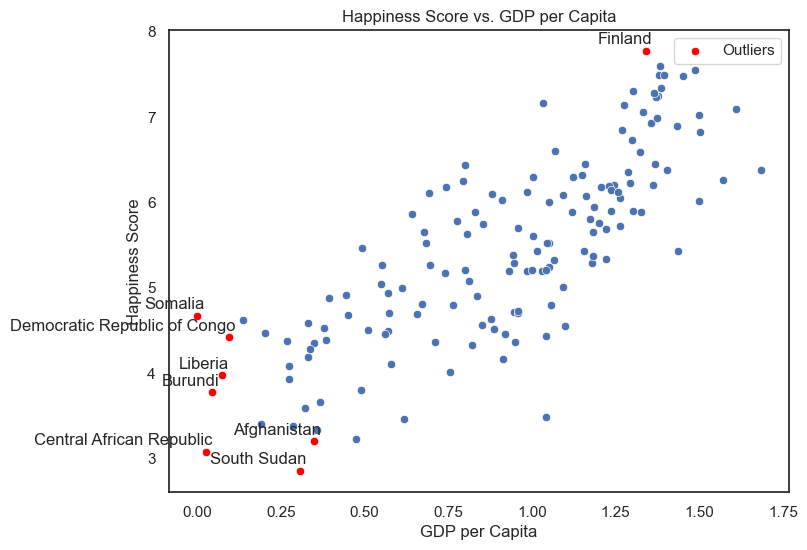

In [53]:
plt.figure(figsize=(8,6))

z_scores = np.abs(zscore(happiness_2019[['GDP per capita', 'Score']]))  # Compute Z-score
outliers = (z_scores > 2.0).any(axis=1)  # Outliers: if Score OR GDP is above threshold

sns.scatterplot(data=happiness_2019, x="GDP per capita", y="Score")
sns.scatterplot(data=happiness_2019[outliers], x='GDP per capita', y='Score', color='red', label="Outliers")

for i, row in happiness_2019[outliers].iterrows():
    plt.annotate(row['Country or region'], (row['GDP per capita'], row['Score']), textcoords="offset points", xytext=(5,5), ha='right')


plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. GDP per Capita")
plt.show()

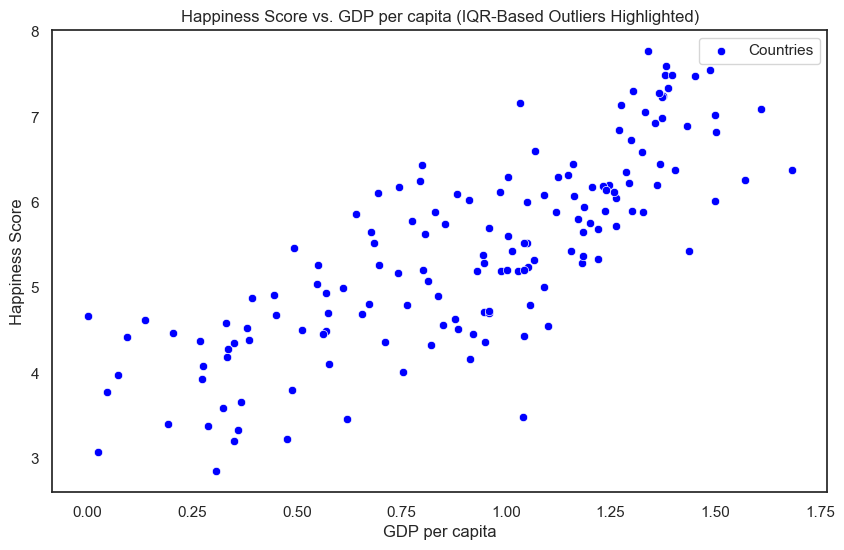

In [54]:
# Select relevant columns
df = happiness_2019[['Country or region', 'Score', 'GDP per capita']]  # Adjust column names if needed

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Identify outliers in Score & Freedom
outliers_score = detect_outliers_iqr(df, 'Score')
outliers_freedom = detect_outliers_iqr(df, 'GDP per capita')
outliers = outliers_score | outliers_freedom  # Outliers in either column

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP per capita', y='Score', color='blue', label="Countries")

# Highlight outliers in red
sns.scatterplot(data=df[outliers], x='GDP per capita', y='Score', color='red', label="Outliers")

# Annotate outliers with country names
for i, row in df[outliers].iterrows():
    plt.annotate(row['Country or region'], (row['GDP per capita'], row['Score']), textcoords="offset points", xytext=(5,5), ha='right')

# Labels and title
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. GDP per capita (IQR-Based Outliers Highlighted)")
plt.legend()
plt.show()

## Score vs Continents

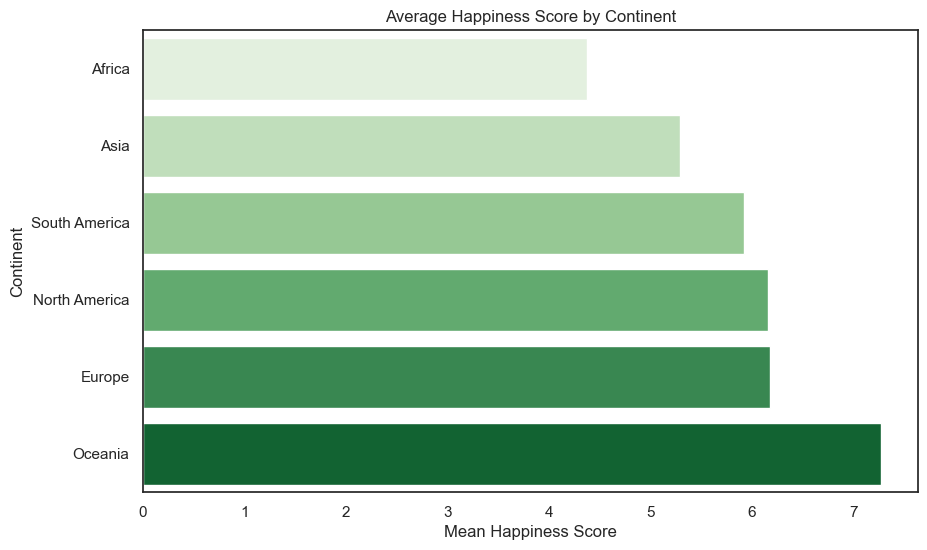

In [55]:
# Compute mean score per continent
mean_scores = happiness_2019.groupby("Continent")["Score"].mean().reset_index()

# Sort by score for better visualization
mean_scores = mean_scores.sort_values(by="Score", ascending=True)  # Reverse order for correct coloring


# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Score", y="Continent", data=mean_scores, palette="Greens")

# Labels and title
plt.xlabel("Mean Happiness Score")
plt.ylabel("Continent")
plt.title("Average Happiness Score by Continent")

# Show the plot
plt.show()

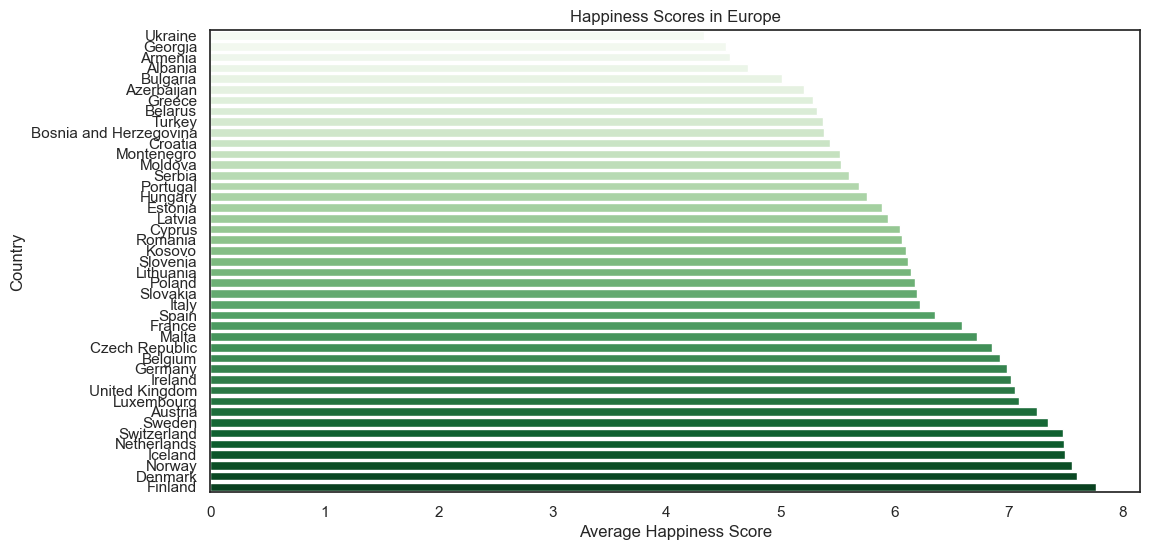

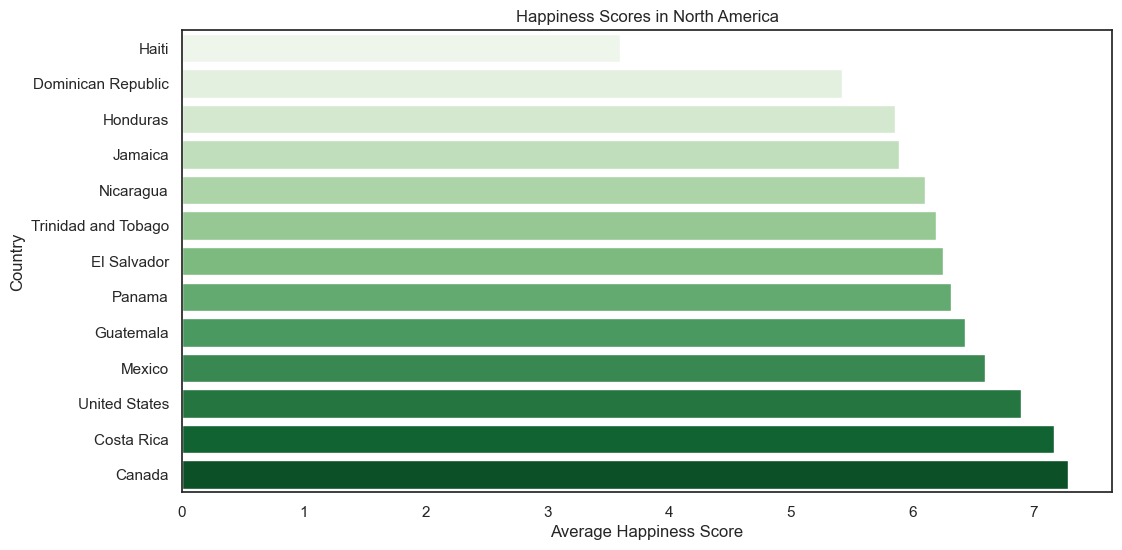

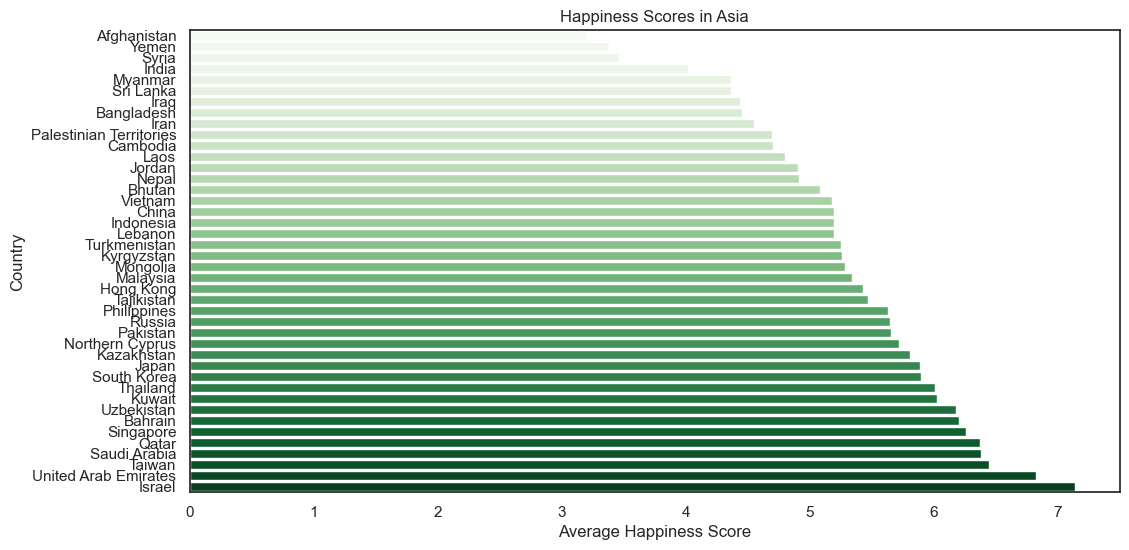

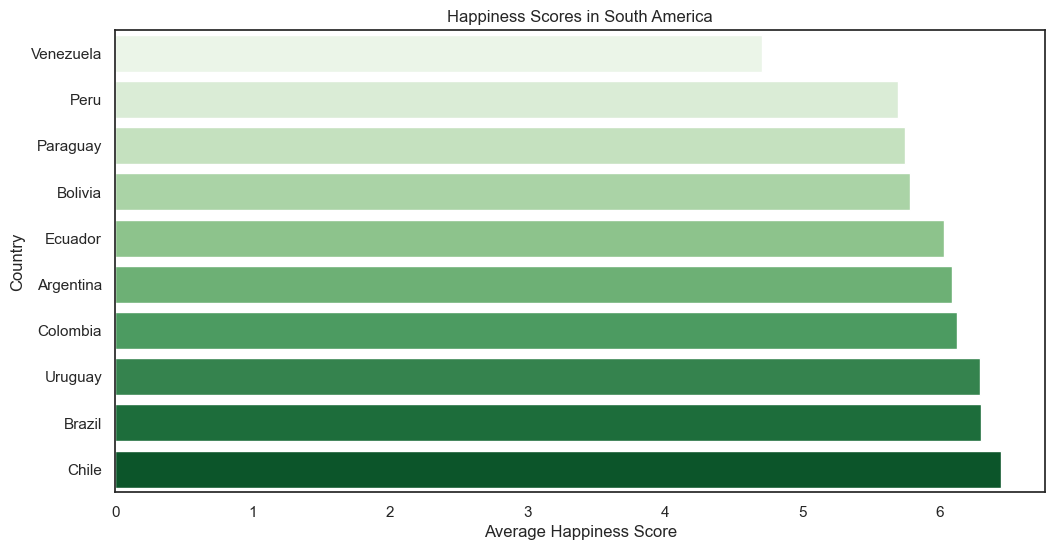

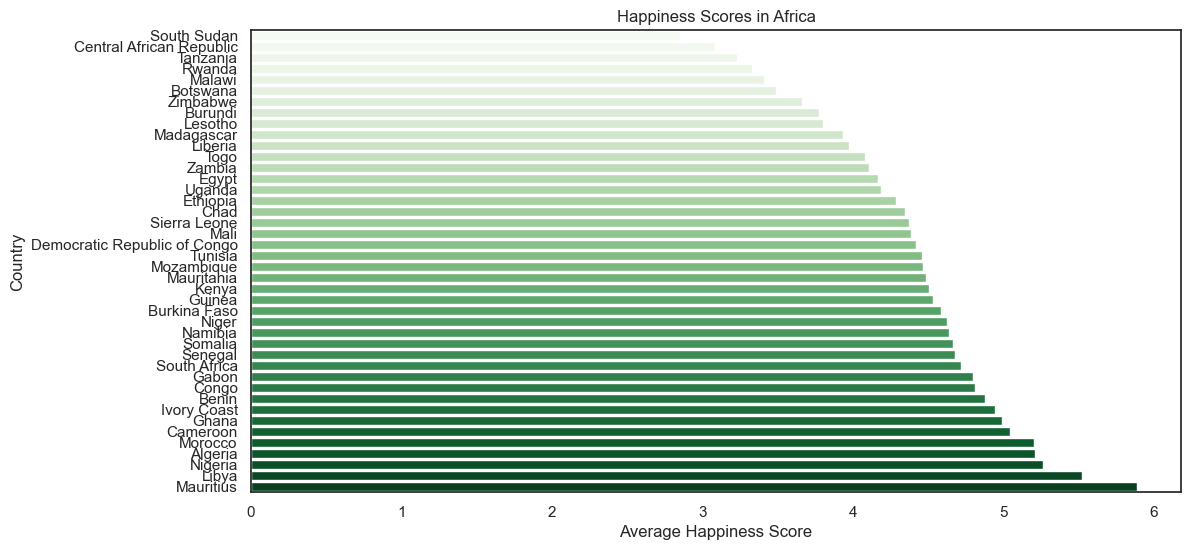

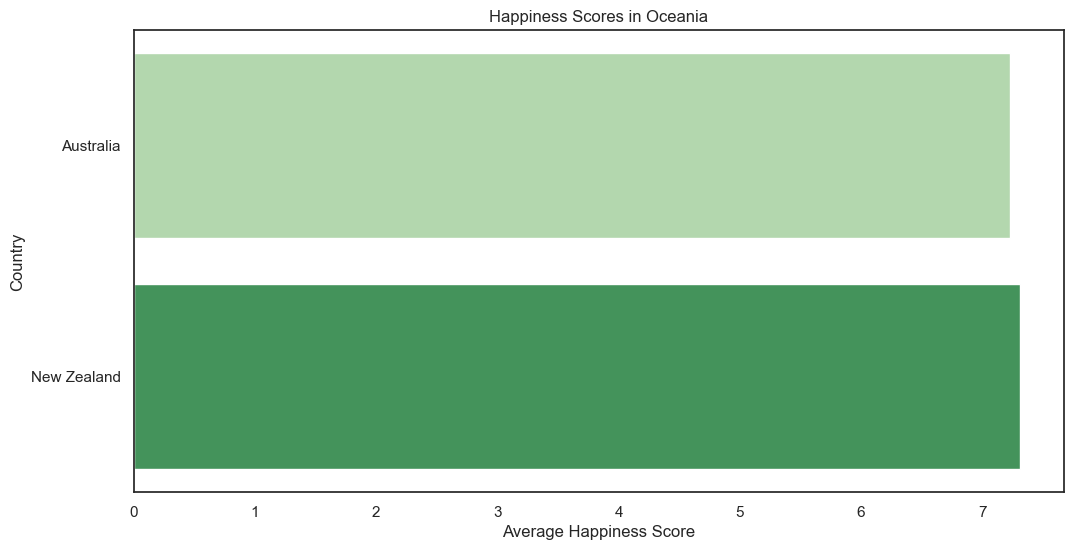

In [56]:
def plot_continent_scores(df, continent):
    """Plots happiness scores for countries within a given continent."""
    df_continent = df[df["Continent"] == continent]  # Filter data for the continent

    # Sort countries by score for better visualization
    df_continent = df_continent.groupby("Country or region")["Score"].mean().reset_index()
    df_continent = df_continent.sort_values(by="Score", ascending=True)

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Country or region", data=df_continent, palette="Greens")

    # Titles and labels
    plt.xlabel("Average Happiness Score")
    plt.ylabel("Country")
    plt.title(f"Happiness Scores in {continent}")

    # Show the plot
    plt.show()
    
# Get unique continents
continents = happiness_2019["Continent"].unique()

# Generate a plot for each continent
for continent in continents:
    plot_continent_scores(happiness_2019, continent)

In [57]:
# Compute mean and standard deviation for each continent
continent_stats = happiness_2019.groupby("Continent")["Score"].agg(["mean", "std"]).reset_index()

# Rename columns for clarity
continent_stats.rename(columns={"mean": "Mean Score", "std": "Standard Deviation"}, inplace=True)

# Drop NaN standard deviations (if any)
continent_stats = continent_stats.dropna(subset=["Standard Deviation"])

# Sort values for better visualization
continent_stats = continent_stats.sort_values(by="Mean Score", ascending=False)

# Ensure xerr has the correct shape
# xerr should be a list or array with length equal to the number of continents (i.e., mean values)
yerr_values = continent_stats["Standard Deviation"].values
yerr_values.shape

(6,)

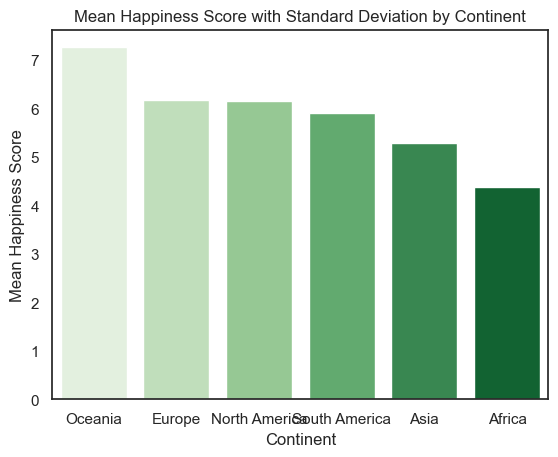

In [58]:
sns.barplot(
    
    x="Continent",
    y="Mean Score",
    data=continent_stats,
    palette="Greens"
    #yerr = yerr_values
)

# Labels and title
plt.ylabel("Mean Happiness Score")
plt.xlabel("Continent")
plt.title("Mean Happiness Score with Standard Deviation by Continent")

# Show the plot
plt.show()

In [59]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x="Continent", y="Mean Value", hue="Factor", data=mean_factors_melted, palette="tab10")

# Add titles and labels
plt.title("Factors per Continent", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha="right")

# Move the legend outside the plot
plt.legend(title="Factor", bbox_to_anchor=(1.05, 1), loc="upper left")  # Moves legend to the right

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



NameError: name 'mean_factors_melted' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
## Happiness  over the countries

In [ ]:

fig = px.choropleth(happiness_2019, 
                    locations="Country or region",
                    locationmode="country names",
                    color="Score",
                    hover_name="Country or region",
                    animation_frame="year",
                    color_continuous_scale="Greens")

#fig.update_layout(title="Global Happiness Score")
fig.update_layout(    
    width=1000,  # Increase width (default is around 700)
    height=584   # Increase height (default is around 450)
)
fig.show()

In [ ]:
import folium
import json
import requests


# Load the world GeoJSON file (contains country boundaries)
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
geojson_data = requests.get(geojson_url).json()

# Create a Folium map centered on the world
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    name="Happiness Score",
    data= happiness_2019,
    columns=["Country or region", "Score"],
    key_on="feature.properties.name",
    fill_color="Greens",     
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Happiness Score"
).add_to(m)

# Display the map
m

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity']
X = happiness_filtered[features]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
happiness_filtered["Cluster"] = kmeans.fit_predict(X_scaled)

# Scatter plot: Happiness Score vs. GDP, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=happiness_filtered, x="GDP per capita", y="Score", hue="Cluster", palette="Greens")

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Clustering Countries by Happiness Factors")
plt.show()

In [ ]:
df = happiness_2019
df["Country or region"] = df["Country or region"].str.strip()

# Create a bubble map
fig = px.scatter_geo(
    df,
    locations="Country or region",  # Column with country names
    locationmode="country names",   # Use country names for geolocation
    size="GDP per capita",          # Bubble size based on GDP per capita
    color="Score",                  # Color based on Happiness Score
    hover_name="Country or region", # Hover text shows country names
    hover_data=["Score", "GDP per capita", "Social support"],
    title="Global Happiness Score (Bubble Map)",
    projection="natural earth" ,     # World map projection
    color_continuous_scale="Greens"  # Change color scale to Greens
)
fig.update_layout(
    width=1000,  # Increase width (default is around 700)
    height=584   # Increase height (default is around 450)
)
# Show the map
fig.show()